# Cancer Diagnosis 1

<font size = 3> <b>The workflow is as follows:</b><br><br>
___1. ___ A molecular pathologist selects a list of genetic variations of interest that he/she want to analyze <br>
___2. ___The molecular pathologist searches for evidence in the medical literature that somehow are relevant to the genetic variations of interest <br>
___3. ___ Finally this molecular pathologist spends a huge amount of time analyzing the evidence related to each of the variations to classify them <br><br>

Our goal here is to replace step 3 by a machine learning model. The molecular pathologist will still have to decide which variations are of interest, and also collect the relevant evidence for them. But the last step, which is also the most time consuming, will be fully automated.</font><br>

<i> Ref : https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462

<font size = 3> <br><b>Problem statement : </b> <br>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

In [1]:
# HarshD
import os

os.chdir('E:\Datasets\Cancer Diagnosis')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('training_variants.csv')

df.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [4]:
print(' Data points : ', df.shape[0] )
print(' Features : ', df.columns.values[0:3] )

 Data points :  3321
 Features :  ['ID' 'Gene' 'Variation']


In [5]:
print( len( df['Gene'].value_counts() ), ' different kind of Gene ' )
print( len( df['Variation'].value_counts() ), ' different kind of Variations ' )
print( len( df['Class'].value_counts() ), ' different kind of Class ' )

264  different kind of Gene 
2996  different kind of Variations 
9  different kind of Class 


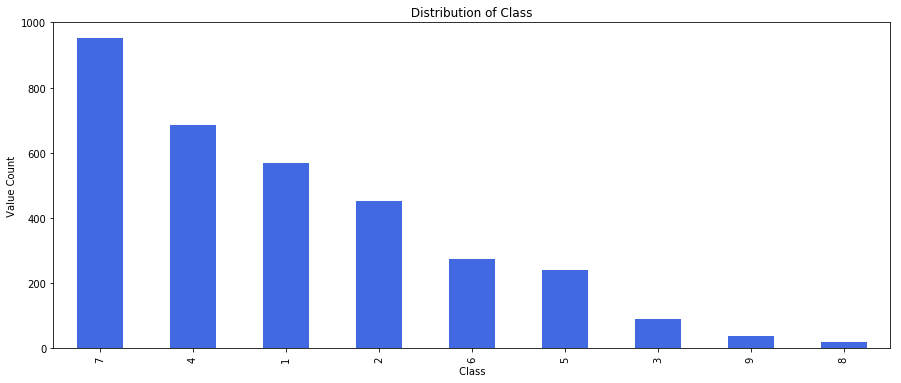

In [6]:
df['Class'].value_counts().plot(kind = 'bar', figsize = (15,6), color='royalblue' )
plt.title(' Distribution of Class ')
plt.xlabel(' Class ')
plt.ylabel(' Value Count ')
plt.show()

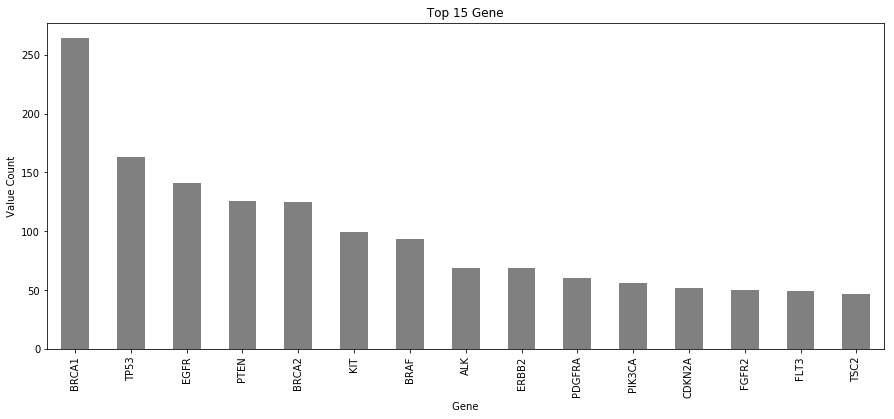

-------------------------------------------------- 264  Unique Genes --------------------------------------------------


In [7]:
df['Gene'].value_counts()[0:15].plot(kind = 'bar', figsize = (15,6), color='gray' )
plt.title(' Top 15 Gene ')
plt.xlabel(' Gene ')
plt.ylabel(' Value Count ')
plt.show()

print( '-' * 50, len( df['Gene'].value_counts() ), ' Unique Genes', '-' * 50 )

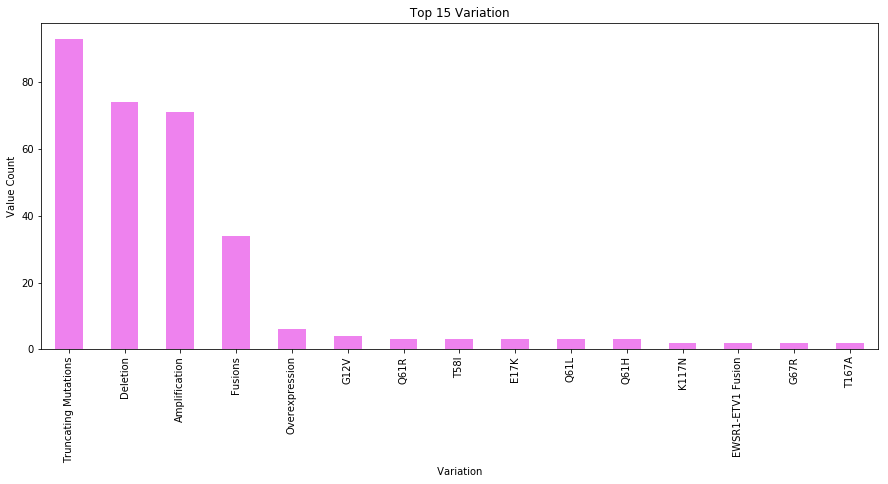

-------------------------------------------------- 2996  Unique Variation --------------------------------------------------


In [8]:
df['Variation'].value_counts()[0:15].plot(kind = 'bar', figsize = (15,6), color='violet' )
plt.title(' Top 15 Variation ')
plt.xlabel(' Variation ')
plt.ylabel(' Value Count ')
plt.show()

print( '-' * 50, len( df['Variation'].value_counts() ), ' Unique Variation', '-' * 50 )

Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

In [9]:
df[ df.isnull().any(axis=1) ] 

,ID,Gene,Variation,Class


In [10]:
dfText =pd.read_csv("training_text", sep="\|\|", engine="python", names=["ID","TEXT"], skiprows = 1)

dfText.head()

# Our data is like, ID || TEXT i,e; 0 || Cyclin-dependent kinases (CDKs) regulate a var.. so we used || as a seperator
# sep="\|\|" is nothing but sepearte based on ||
# since 1st row comes 0	ID,Text	None so we do skiprows = 1

,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [11]:
dfText['TEXT'][1][0:1000]

' Abstract Background  Non-small cell lung cancer (NSCLC) is a heterogeneous group of disorders with a number of genetic and proteomic alterations. c-CBL is an E3 ubiquitin ligase and adaptor molecule important in normal homeostasis and cancer. We determined the genetic variations of c-CBL, relationship to receptor tyrosine kinases (EGFR and MET), and functionality in NSCLC.  Methods and Findings  Using archival formalin-fixed paraffin embedded (FFPE) extracted genomic DNA, we show that c-CBL mutations occur in somatic fashion for lung cancers. c-CBL mutations were not mutually exclusive of MET or EGFR mutations; however they were independent of p53 and KRAS mutations. In normal/tumor pairwise analysis, there was significant loss of heterozygosity (LOH) for the c-CBL locus (22%, nâ€Š=â€Š8/37) and none of these samples revealed any mutation in the remaining copy of c-CBL. The c-CBL LOH also positively correlated with EGFR and MET mutations observed in the same samples. Using select c-CB

There are 3321 data points<br><br>
We have:

    264  different kind of Gene

    2996  different kind of Variations 

    9  different kind of Class

### Handling missing data

In [12]:
dfText[ dfText.isnull().any(axis=1) ] # finding NULL values

,ID,TEXT


In [13]:
dfText[ dfText['TEXT'] == 'null' ]

,ID,TEXT
1109,1109,null
1277,1277,null
1407,1407,null
1639,1639,null
2755,2755,null


In [14]:
dfText.loc[ dfText['TEXT'] == 'null','TEXT'] = df['Gene'] + ' ' + df['Variation']

In [15]:
dfText[ dfText['TEXT'] == 'null' ]

,ID,TEXT


## Text Processing

In [16]:
from nltk.corpus import stopwords
import re

from datetime import datetime

In [17]:
stop_words = set( stopwords.words('english') ) # creating a set of stopwords


def process(text, index, column):
    
    if type( text ) is not int :
        sent = ""
        
        text = re.sub('[^a-zA-Z0-9\n]', ' ', text)   # replace every special char with space
        text = re.sub('\s+',' ', text)   # replace multiple spaces with single space
        text = text.lower()   # Converting all the chars into lower-case.

        
        for word in text.split():
        # if the word is a not a stop word then save that word 
            if word not in stop_words:
                sent += word + " "
        
        dfText[column][index] = sent

In [18]:
# DataFrame.iterrows() :  Iterate over DataFrame rows as (index, Series) pairs. A better way to loop through rows
# iterrows() is a generator that iterates over the rows of the dataframe and returns the index of each row, in addition...
# .... to an object containing the row itself. Faster than manually looping over rows.

start = datetime.now()

for index, row in dfText.iterrows():
    
    if type( row['TEXT'] ) is str:
        process( row['TEXT'], index, 'TEXT')
    else:
        print(" No text description for id : ", index )

print("Time taken to run this cell :", datetime.now() - start )

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Time taken to run this cell : 0:03:07.672454


In [19]:
dfText.head()

,ID,TEXT
0,0,cyclin dependent kinases cdks regulate variety...
1,1,abstract background non small cell lung cancer...
2,2,abstract background non small cell lung cancer...
3,3,recent evidence demonstrated acquired uniparen...
4,4,oncogenic mutations monomeric casitas b lineag...


In [20]:
print( len(dfText['TEXT'][2]) )
dfText['TEXT'][2][0:1000]

27844


'abstract background non small cell lung cancer nsclc heterogeneous group disorders number genetic proteomic alterations c cbl e3 ubiquitin ligase adaptor molecule important normal homeostasis cancer determined genetic variations c cbl relationship receptor tyrosine kinases egfr met functionality nsclc methods findings using archival formalin fixed paraffin embedded ffpe extracted genomic dna show c cbl mutations occur somatic fashion lung cancers c cbl mutations mutually exclusive met egfr mutations however independent p53 kras mutations normal tumor pairwise analysis significant loss heterozygosity loh c cbl locus 22 n 8 37 none samples revealed mutation remaining copy c cbl c cbl loh also positively correlated egfr met mutations observed samples using select c cbl somatic mutations s80n h94y q249e w802 obtained caucasian taiwanese african american samples respectively transfected nsclc cell lines increased cell viability cell motility conclusions taking overall mutation rate c cbl c

In [21]:
# Merging the two dataframes
data = pd.merge( df, dfText, on='ID', how='left' )
data.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [22]:
data[ data.isnull().any(axis=1) ]

,ID,Gene,Variation,Class,TEXT


In [23]:
# Replacing ' ' in Categorical features with _

data.Gene  = data.Gene.str.replace('\s+', '_') 

data.Variation = data.Variation.str.replace('\s+', '_')

In [24]:
Y = data['Class'].values

In [25]:
from sklearn.model_selection import train_test_split

# Test Train CV split
xtr, xte, ytr, yte = train_test_split( data, Y , stratify = Y, test_size = 0.2 )

xtr, xcv, ytr, ycv = train_test_split( xtr, ytr, stratify = ytr, test_size = 0.2 )

In [26]:
print( xtr.shape )
print( xte.shape )
print( xcv.shape )
print( ytr.shape )
print( yte.shape )
print( ycv.shape )

(2124, 5)
(665, 5)
(532, 5)
(2124,)
(665,)
(532,)


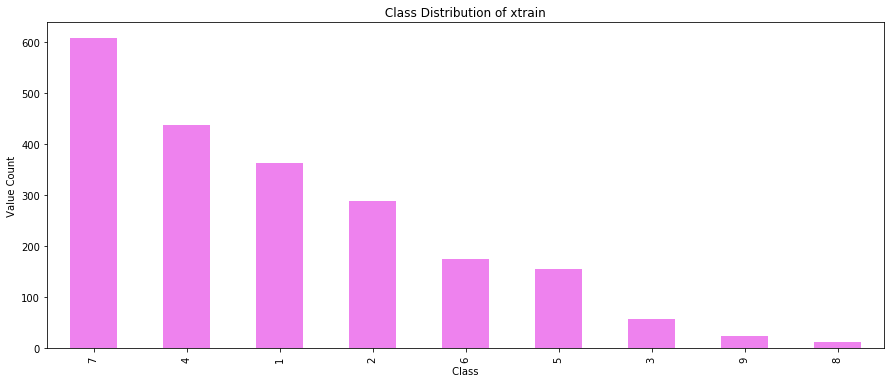

 % of datapoints belonging to Class  7 is :  28.6723  %
 % of datapoints belonging to Class  4 is :  20.6685  %
 % of datapoints belonging to Class  1 is :  17.0904  %
 % of datapoints belonging to Class  2 is :  13.6064  %
 % of datapoints belonging to Class  6 is :  8.2863  %
 % of datapoints belonging to Class  5 is :  7.2976  %
 % of datapoints belonging to Class  3 is :  2.6836  %
 % of datapoints belonging to Class  9 is :  1.1299  %
 % of datapoints belonging to Class  8 is :  0.565  %


In [27]:
xtr['Class'].value_counts().plot(kind = 'bar', figsize = (15,6), color='violet' )
plt.title(' Class Distribution of xtrain ')
plt.xlabel(' Class ')
plt.ylabel(' Value Count ')
plt.show()

li = dict( xtr['Class'].value_counts() )
for key in li:
    print(' % of datapoints belonging to Class ', key, 'is : ', np.round( ( li[key] / xtr.shape[0] ) * 100 , 4), ' %' )

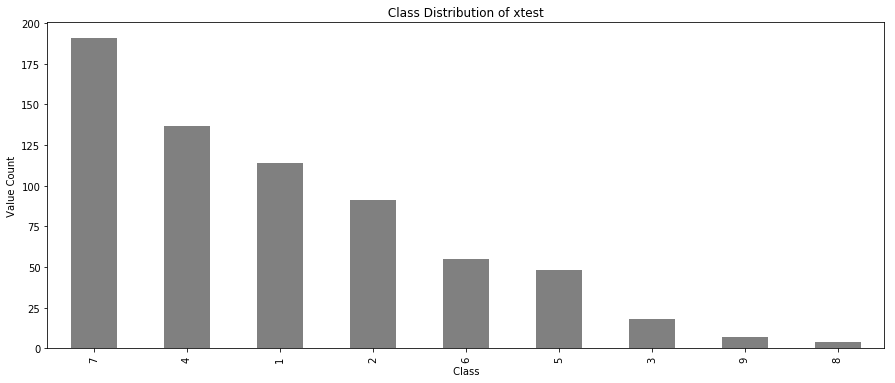

 % of datapoints belonging to Class  7 is :  28.7218  %
 % of datapoints belonging to Class  4 is :  20.6015  %
 % of datapoints belonging to Class  1 is :  17.1429  %
 % of datapoints belonging to Class  2 is :  13.6842  %
 % of datapoints belonging to Class  6 is :  8.2707  %
 % of datapoints belonging to Class  5 is :  7.218  %
 % of datapoints belonging to Class  3 is :  2.7068  %
 % of datapoints belonging to Class  9 is :  1.0526  %
 % of datapoints belonging to Class  8 is :  0.6015  %


In [28]:
xte['Class'].value_counts().plot( kind = 'bar', figsize = (15,6), color='gray' )
plt.title(' Class Distribution of xtest ')
plt.xlabel(' Class ')
plt.ylabel(' Value Count ')
plt.show()

li = dict( xte['Class'].value_counts() )
for key in li:
    print(' % of datapoints belonging to Class ', key, 'is : ', np.round( ( li[key] / xte.shape[0] ) * 100 , 4), ' %' )

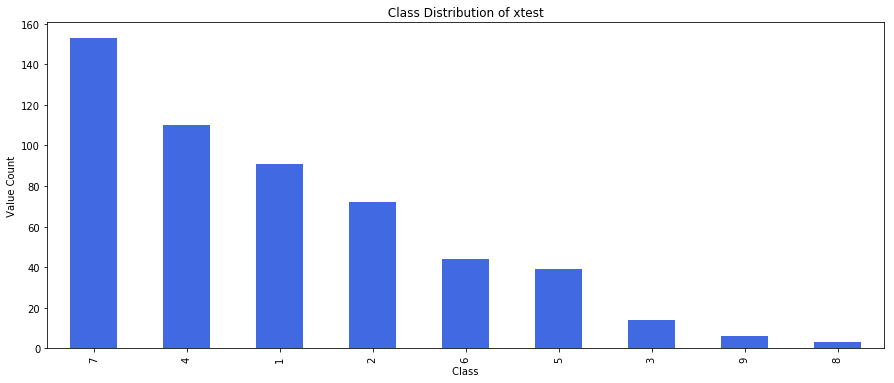

 % of datapoints belonging to Class  7 is :  28.7594  %
 % of datapoints belonging to Class  4 is :  20.6767  %
 % of datapoints belonging to Class  1 is :  17.1053  %
 % of datapoints belonging to Class  2 is :  13.5338  %
 % of datapoints belonging to Class  6 is :  8.2707  %
 % of datapoints belonging to Class  5 is :  7.3308  %
 % of datapoints belonging to Class  3 is :  2.6316  %
 % of datapoints belonging to Class  9 is :  1.1278  %
 % of datapoints belonging to Class  8 is :  0.5639  %


In [29]:
xcv['Class'].value_counts().plot( kind = 'bar', figsize = (15,6), color='royalblue' )
plt.title(' Class Distribution of xtest ')
plt.xlabel(' Class ')
plt.ylabel(' Value Count ')
plt.show()

li = dict( xcv['Class'].value_counts() )
for key in li:
    print(' % of datapoints belonging to Class ', key, 'is : ', np.round( ( li[key] / xcv.shape[0] ) * 100 , 4), ' %' )

All the data ( test, train, cross validation ) follow the same order of distribution of classes

( Highest data points ) Class : 7 > 4 > 1 > 2 > 6 > 5 > 3 > 9 > 8  ( Lowest data points ) 

### Function for response coding of Gene/ Variation features

In [30]:
# 1. Consider all unique values and the number of occurances of given feature in train data dataframe
# 2. Build a vector (1*9) , 
 # The 1st element = ( no. of times it occured in class 1 to 10 * alpha / no. of time it occurred in total data + 90 * alpha )
# featDict is like a look up table, for every gene it store a (1*9) representation of it

# 3. for a value of feature in df:
#       if it is in train data:
#           we add the vector that was stored in 'featDict' look up table to 'feature'
#       if it is not there is train:
#           we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'feature'
#    return 'feature'

# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['xtr', 'xte', 'xcv']

In [31]:
def feaDic( alpha, feature, df ):
    
    count = xtr[ feature ].value_counts()
    # output:
    #        {BRCA1      174
    #         TP53       106
    #         EGFR        86.....
    
    # featDict : Feature Dict, which contains the probability array for each gene/variation
    featDict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    
    for i, denominator in count.items():
        # i = Feature name ( Gene name / Variation name ) ex=> BRCA1 , TP53, PTEN .......
        # denominator = Count of the feature i ex => 264, 163, 126 ......
        
        # vec will contain ( P( yi == 1 / Gi ) probability of gene/variation belongs to particular class
        # vec is 9 diamensional vector since we have 9 classes
        vec = []
        
        for j in range(1,10):  # itearte 9 times
           
            # print( xtr.loc[ ( xtr['Class'] == 1 ) & ( xtr['Gene'] == 'BRCA1' )] )
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1....
            
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = xtr.loc[ ( xtr['Class'] == j ) & ( xtr[feature] == i ) ]
            # cls_cnt will return a type(xtr) that will contain Only single features belonging to a single class
            # i.e; if Class = 3 and feature is Gene and Gene = BRCA1 It will only return that combination of Class and Gene
            
            # cls_cnt.shape[0] will contain the number of time that particular feature occured in the whole data
            
            vec.append( ( cls_cnt.shape[0] + alpha * 10 ) / ( denominator + 90 * alpha ) )

        # we are adding the gene/variation to the dict as key and vec as value
        featDict[i] = vec
    return featDict

# when we caculate the probability of a feature belongs to any particular class, we apply laplace smoothing
# (numerator + 10 *alpha) / (denominator + 90 *alpha ) 

In [32]:
def feature( alpha, feature, df ):
   
    featureDict = feaDic( alpha, feature, df ) # Function Call

    count = xtr[feature].value_counts()
    
    # feat : Gene_variation feature, it will contain the feature for each feature value in the data
    feat = []
    
    # for every feature values in the given data frame we will check if it is there in the train data then we will add...
    #... the feature to feat. if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to feat
    
    for index, row in df.iterrows():
        
        if row[feature] in dict( count ).keys():
            feat.append( featureDict[ row[feature] ] )
        else:
            feat.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])

    return feat


## Univariate analysis of Genes

In [33]:
uniGenes = xtr['Gene'].value_counts()
print(' Number of Unique Genes : ', uniGenes.shape[0])
print( uniGenes.head(10) )

 Number of Unique Genes :  234
BRCA1     172
TP53      114
EGFR       93
PTEN       86
BRCA2      85
KIT        70
BRAF       50
ERBB2      44
PDGFRA     43
PIK3CA     41
Name: Gene, dtype: int64


In [34]:
print(" % of data points in Test and CV datasets that are covered by the ", uniGenes.shape[0], " genes in Train dataset")

tc = xte[ xte['Gene'].isin( list( set( xtr['Gene'] ))) ].shape[0] # test coverage
cvc = xcv[ xcv['Gene'].isin( list( set( xtr['Gene'] ))) ].shape[0] # cv coverage

print(' Test data ', tc, ' : ',( tc / xte.shape[0] ) * 100, ' %')
print(' CV data ', cvc, ' : ',( cvc / xcv.shape[0] ) * 100, ' %')

 % of data points in Test and CV datasets that are covered by the  234  genes in Train dataset
 Test data  645  :  96.99248120300751  %
 CV data  513  :  96.42857142857143  %


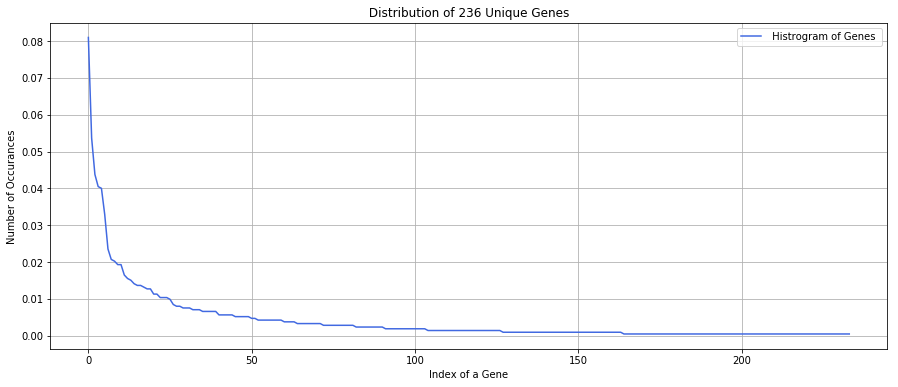

In [35]:
total = sum( uniGenes.values )
plt.figure( figsize = (15, 6) )
plt.plot( uniGenes.values / total , label=" Histrogram of Genes ", color="royalblue")
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.title(' Distribution of 236 Unique Genes ' )
plt.legend()
plt.grid()
plt.show()

Gene is a categorical feature since it belongs to a particular set

Since gene is a categorical feature we can featurize it by using OneHot Encoding or Response Coding

We will choose the appropriate featurization based on the ML model we use. 

For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests.

In [36]:
# Response-coding of the Gene feature
alpha = 1 # alpha is used for laplace smoothing

xtrGeneRC = np.array( feature( alpha, "Gene", xtr) )
xteGeneRC = np.array( feature( alpha, "Gene", xte) )
xcvGeneRC = np.array( feature( alpha, "Gene", xcv) )

print(xtrGeneRC.shape )
print(xcvGeneRC.shape )
print(xteGeneRC.shape )


(2124, 9)
(532, 9)
(665, 9)


In [37]:
print(' Their no. of cols is same as class names')
xtrGeneRC[21]

 Their no. of cols is same as class names


array([0.15789474, 0.0877193 , 0.0877193 , 0.20175439, 0.10526316,
       0.09649123, 0.0877193 , 0.0877193 , 0.0877193 ])

In [38]:
# One Hot Encoding
from sklearn.feature_extraction.text import CountVectorizer

gVect = CountVectorizer()

xtrGeneOH = gVect.fit_transform( xtr['Gene'] )
xteGeneOH = gVect.transform( xte['Gene'] )
xcvGeneOH = gVect.transform( xcv['Gene'] )

print(xtrGeneOH.shape )
print(xcvGeneOH.shape )
print(xteGeneOH.shape )

(2124, 233)
(532, 233)
(665, 233)


In [39]:
xtrGeneOH[20]

<1x233 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [40]:
print( gVect.get_feature_names()[0:30] )
print( len( gVect.get_feature_names() ) )

['abl1', 'acvr1', 'ago2', 'akt1', 'akt2', 'akt3', 'alk', 'apc', 'ar', 'araf', 'arid1a', 'arid2', 'arid5b', 'asxl1', 'asxl2', 'atm', 'atrx', 'aurka', 'aurkb', 'b2m', 'bap1', 'bard1', 'bcl10', 'bcl2l11', 'bcor', 'braf', 'brca1', 'brca2', 'brd4', 'brip1']
233


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.calibration import CalibratedClassifierCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss

import warnings
warnings.filterwarnings("ignore")

In [42]:
c = [ 10 ** x for x in range(-5, 3) ] # Various value of Hyperparameter

logError = [ ]

for i in c :
    classifier = LogisticRegression( C = i, random_state = 42, n_jobs = -1) 
    classifier.fit(xtrGeneOH, ytr)
    
    # ClaibratedClassifierCV() : Probability calibration with isotonic regression or sigmoid.
    # With this class, the base_estimator is fit on the train set of the cross-validation generator and the ......
    # .... test set is used for calibration. The probabilities for each of the folds are then averaged for prediction
    
    clf = CalibratedClassifierCV( classifier, method="sigmoid" )
    
    # base_estimator : (classifier) The classifier whose output decision func needs to be calibrated to offer more accurate...
    # .... predict_proba outputs. If cv=prefit, the classifier must have been fit already on data.
    
    clf.fit(xtrGeneOH, ytr)
    predictY = clf.predict_proba( xcvGeneOH ) # Perdicted for Cross Validation
    
    logError.append( log_loss( ycv, predictY, labels = clf.classes_, eps = 1e-15) )
    print('For values of C = ', i, " the log loss is : ",log_loss(ycv, predictY, labels=clf.classes_, eps=1e-15) )

For values of C =  1e-05  the log loss is :  1.466667768849157
For values of C =  0.0001  the log loss is :  1.4605683738039155
For values of C =  0.001  the log loss is :  1.4229051448572063
For values of C =  0.01  the log loss is :  1.379274605106928
For values of C =  0.1  the log loss is :  1.3083546018549843
For values of C =  1  the log loss is :  1.2129622763381915
For values of C =  10  the log loss is :  1.1913375871462097
For values of C =  100  the log loss is :  1.2133674566458985


In [43]:
bestC = np.argmin( logError )

clf = LogisticRegression( C = c[bestC], random_state = 42, n_jobs = -1 )
clf.fit(xtrGeneOH, ytr)

clf = CalibratedClassifierCV( clf, method="sigmoid" )
clf.fit(xtrGeneOH, ytr)

print(' Best C : ', c[bestC])

predictY = clf.predict_proba( xtrGeneOH )
print(' The train log loss is : ',log_loss( ytr, predictY, labels = clf.classes_, eps = 1e-15) )

predictY = clf.predict_proba( xteGeneOH )
print(' The test log loss is : ',log_loss( yte, predictY, labels = clf.classes_, eps = 1e-15) )

predictY = clf.predict_proba( xcvGeneOH )
print(' The cv log loss is : ',log_loss( ycv, predictY, labels = clf.classes_, eps = 1e-15) )


 Best C :  10
 The train log loss is :  0.9791089332699188
 The test log loss is :  1.2396908853900472
 The cv log loss is :  1.1913375871462097


Gene feture is Stable across all datasets ( Test, Train, Cross Validation ) 

Otherwise, the Cross Validation and Test errors would be significantly more than Train error.

### Univariate Analysis Variation

In [44]:
uniVars = xtr['Variation'].value_counts()
print(' Number of Unique Variation : ', uniVars.shape[0])
print( uniVars.head(10) )

 Number of Unique Variation :  1942
Truncating_Mutations         57
Amplification                47
Deletion                     41
Fusions                      19
Overexpression                5
Q61L                          3
Q61R                          3
Promoter_Hypermethylation     2
M1R                           2
EWSR1-ETV1_Fusion             2
Name: Variation, dtype: int64


In [45]:
print(" % of data points in Test and CV datasets that are covered by the ", uniVars.shape[0], " variations in Train dataset")

tc = xte[ xte['Variation'].isin( list( set( xtr['Variation'] ))) ].shape[0] # test coverage
cvc = xcv[ xcv['Variation'].isin( list( set( xtr['Variation'] ))) ].shape[0] # cv coverage

print(' Test data ', tc, ' : ',( tc / xte.shape[0] ) * 100, ' %')
print(' CV data ', cvc, ' : ',( cvc / xcv.shape[0] ) * 100, ' %')

 % of data points in Test and CV datasets that are covered by the  1942  variations in Train dataset
 Test data  74  :  11.12781954887218  %
 CV data  61  :  11.466165413533833  %


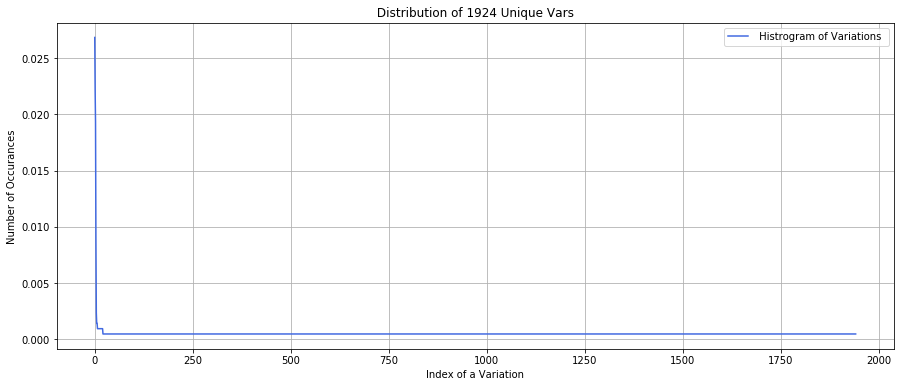

In [46]:
total = sum( uniVars.values )
plt.figure( figsize = (15, 6) )
plt.plot( uniVars.values / total , label=" Histrogram of Variations ", color="royalblue")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.title(' Distribution of 1924 Unique Vars ' )
plt.legend()
plt.grid()
plt.show()

In [47]:
# Response-coding of the Variation feature
alpha = 1 # alpha is used for laplace smoothing

xtrVarRC = np.array( feature( alpha, "Variation", xtr) )
xteVarRC = np.array( feature( alpha, "Variation", xte) )
xcvVarRC = np.array( feature( alpha, "Variation", xcv) )

print(xtrVarRC.shape )
print(xcvVarRC.shape )
print(xteVarRC.shape )

(2124, 9)
(532, 9)
(665, 9)


In [48]:
print(' Their no. of cols is same as class names')
xtrVarRC[21]

 Their no. of cols is same as class names


array([0.10989011, 0.10989011, 0.10989011, 0.12087912, 0.10989011,
       0.10989011, 0.10989011, 0.10989011, 0.10989011])

In [49]:
# One Hot Encoding
from sklearn.feature_extraction.text import CountVectorizer

vVect = CountVectorizer()

xtrVarOH = vVect.fit_transform( xtr['Variation'] )
xteVarOH = vVect.transform( xte['Variation'] )
xcvVarOH = vVect.transform( xcv['Variation'] )

print(xtrVarOH.shape )
print(xcvVarOH.shape )
print(xteVarOH.shape )

(2124, 1978)
(532, 1978)
(665, 1978)


In [50]:
print( len( vVect.get_feature_names() ) )
print( vVect.get_feature_names()[0:90] )

1978
['126', '1_2009trunc', '1_fusion', '2010_2471trunc', '256_286trunc', '385_418del', '422_605trunc', '534_536del', '560_561inser', '596_619splice', '6a', '963_d1010splice', '_baiap2l1_fusion', '_fusion', 'a1020v', 'a1022e', 'a1066v', 'a1099t', 'a1131t', 'a113_splice', 'a11_g12insga', 'a1200v', 'a120s', 'a121p', 'a1234t', 'a126g', 'a126s', 'a126v', 'a1374v', 'a146t', 'a146v', 'a149p', 'a1519t', 'a151t', 'a159t', 'a1669s', 'a1708e', 'a1708v', 'a171v', 'a1752p', 'a1789t', 'a1823t', 'a1830t', 'a1843t', 'a18d', 'a197t', 'a19v', 'a2034v', 'a205t', 'a209t', 'a211d', 'a232v', 'a23e', 'a2425t', 'a246p', 'a2643g', 'a2717s', 'a2770t', 'a339v', 'a39p', 'a40e', 'a41p', 'a459v', 'a500t', 'a502_y503dup', 'a57v', 'a60v', 'a617t', 'a633t', 'a634d', 'a634v', 'a636p', 'a648t', 'a723d', 'a727v', 'a72s', 'a72v', 'a750_e758del', 'a750p', 'a75p', 'a763_y764insfqea', 'a767_v769del', 'a767_v769dup', 'a77p', 'a77t', 'a864t', 'a883t', 'a8s', 'a919v', 'a95d']


In [51]:
c = [ 10 ** x for x in range(-5, 3) ] # Various value of Hyperparameter

logError = [ ]

for i in c :
    classifier = LogisticRegression( C = i, random_state = 42, n_jobs = -1) 
    classifier.fit(xtrVarOH, ytr)
    
    # ClaibratedClassifierCV() : Probability calibration with isotonic regression or sigmoid.
    # With this class, the base_estimator is fit on the train set of the cross-validation generator and the ......
    # .... test set is used for calibration. The probabilities for each of the folds are then averaged for prediction
    
    clf = CalibratedClassifierCV( classifier, method="sigmoid" )
    
    # base_estimator : (classifier) The classifier whose output decision func needs to be calibrated to offer more accurate...
    # .... predict_proba outputs. If cv=prefit, the classifier must have been fit already on data.
    
    clf.fit(xtrVarOH, ytr)
    
    predictY = clf.predict_proba( xcvVarOH )
    
    logError.append( log_loss( ycv, predictY, labels = clf.classes_, eps = 1e-15) )
    print('For values of C = ', i, " the log loss is : ",log_loss(ycv, predictY, labels=clf.classes_, eps=1e-15) )

For values of C =  1e-05  the log loss is :  1.717901515766875
For values of C =  0.0001  the log loss is :  1.7180551241378539
For values of C =  0.001  the log loss is :  1.7183140789416333
For values of C =  0.01  the log loss is :  1.6980350654677618
For values of C =  0.1  the log loss is :  1.6910747351679554
For values of C =  1  the log loss is :  1.6809358328571404
For values of C =  10  the log loss is :  1.6783804029859424
For values of C =  100  the log loss is :  1.6845211248122


In [52]:
bestC = np.argmin( logError )

clf = LogisticRegression( C = c[bestC], random_state = 42, n_jobs = -1 )
clf.fit(xtrVarOH, ytr)

clf = CalibratedClassifierCV( clf, method="sigmoid" )
clf.fit(xtrVarOH, ytr)

print(' Best C : ', c[bestC])

predictY = clf.predict_proba( xtrVarOH )
print(' The train log loss is : ',log_loss( ytr, predictY, labels = clf.classes_, eps = 1e-15) )

predictY = clf.predict_proba( xteVarOH )
print(' The test log loss is : ',log_loss( yte, predictY, labels = clf.classes_, eps = 1e-15) )

predictY = clf.predict_proba( xcvVarOH )
print(' The cv log loss is : ',log_loss( ycv, predictY, labels = clf.classes_, eps = 1e-15) )

 Best C :  10
 The train log loss is :  0.6992931026429651
 The test log loss is :  1.7061550158537573
 The cv log loss is :  1.6783804029859424


## Univariate Analysis Text Features

### Function for response coding of Text features

In [53]:
from sklearn.preprocessing import normalize

from collections import Counter, defaultdict

In [54]:
# classText is a data frame of a single class
# 1. for every row in data fram consider the 'TEXT'
# 2.     Split the words by space
# 3.     Make a dict with those words
# 4.     Increment its count whenever we see that word again

def extract(classText):
    
    dictionary = defaultdict( int ) # Creates a collections.defaultdict that contains int as value

    for index, row in classText.iterrows():
        for word in row['TEXT'].split():
            dictionary[word] += 1  # For every word in the text add it to dictionary as key and its value as 1
    return dictionary              # if the same word appers again change its value to + 1 i.e; 2

# After 1 iteraion:
# word = previous
# defaultdict(<class 'int'>, {'cyclin': 2, 'dependent': 1, 'kinases': 1, 'cdks': 2, 'regulate': 1, 'variety': 1, 
# 'fundamental': 1, 'cellular': 1, 'processes': 1, 'cdk10': 1, 'stands': 1, 'one': 1, 'last': 1, 'orphan': 1, 
#  'activating': 1, 'identified': 1, 'kinase': 1, 'activity': 1, 'revealed': 1, 'previous': 1})

In [55]:
# DataFrame.iterrows() :  Iterate over DataFrame rows as (index, Series) pairs. A better way to loop through rows
# iterrows() is a generator that iterates over the rows of the dataframe and returns the index of each row, in addition...
# .... to an object containing the row itself. Faster than manually looping over rows.

In [56]:
import math
def textResponseC(df):
    
    textFeat = np.zeros( ( df.shape[0], 9 ) )
    # creates a numpy.ndarray that has row = rows in df and cols = 9 and contains all 0's
    
    for i in range(0,9):
        row_index = 0
        
        for index, row in df.iterrows():
            # index contains index no. , row contains rowID, Gene, Variation, TEXT
            prob = 0
            for word in row['TEXT'].split():
                prob += math.log(( ( dictli[i].get( word, 0 ) + 10 ) / ( totaldict.get( word, 0 ) + 90 ) ))
                # probability =>  Class = 1 and Word[1] occours / Total no. of times Word[1] occours with Laplace Smoothing
                # here 10 and 90 are alpha fro Laplace smoothing 
                # These probab can be very very small so we take log() later we can take antilog() or exp()
                
            textFeat[ row_index ][i] = math.exp( prob / len( row['TEXT'].split() )) # we take exp() to remove log() i.e; antilog
            row_index += 1
        
    return textFeat

# Ref : #https://stackoverflow.com/a/1602964

In [57]:
tvect = CountVectorizer( min_df = 10, ngram_range=(1,2) ) # Get all Unigrams and Bigrams 1,2
 
# building a CountVectorizer with all the words that occured minimum 3 times in train data

xtrTextOH = tvect.fit_transform( xtr['TEXT'] )

In [58]:
featxtr = tvect.get_feature_names() # getting all the feature names (words)

featxtrCount = xtrTextOH.sum( axis = 0 ).A1
# xtrTextOH.sum( axis = 0 ).A1 : will sum every row and returns ( 1 * number of features ) vector

featxtrDict = dict( zip( list( featxtr ), featxtrCount ))
# zip(list(featxtr),featxtrCount) will zip a word with its number of times it occured

print("Total number of unique words in train data :", len(featxtr))

Total number of unique words in train data : 227386


In [59]:
dictli = [] # dictli : contains 9 dictoinaries each corresponds to a class

for i in range(1,10):
    classText = xtr[ xtr['Class'] == i ]  # build a word dict based on the words in that class
    dictli.append( extract( classText ) ) # Passsing only 1 class at a time and append it to dictli 

# dictli[i] is build on i'th  class text data

totaldict = extract( xtr ) # totaldict is buid on whole training text data

confuse_array = []

for i in featxtr:
    ratios = []
    max_val = -1
    
    for j in range(0,9):
        ratios.append( ( dictli[j][i] + 10 ) / ( totaldict[i] + 90 ) )    
         <!--># here 10 and 90 are alpha fro Laplace smoothing <!-->

    confuse_array.append( ratios )
confuse_array = np.array(confuse_array)

confuse_array.shape

In [60]:
# Response coding of text features

xtrTextRC  = textResponseC( xtr )
xteTextRC  = textResponseC( xte )
xcvTextRC  = textResponseC( xcv )

print( xtrTextRC.shape ) 
print( xteTextRC.shape ) 
print( xcvTextRC.shape ) 

(2124, 9)
(665, 9)
(532, 9)


In [61]:
# We convert (normalize) each row values such that they sum to 1  

xtrTextRC = ( xtrTextRC.T / xtrTextRC.sum( axis=1 ) ).T
xteTextRC = ( xteTextRC.T / xteTextRC.sum( axis=1 ) ).T
xcvTextRC = ( xcvTextRC.T / xcvTextRC.sum( axis=1 ) ).T

# Ref : # https://stackoverflow.com/a/16202486

In [62]:
# Its a good habit of normalizing the data
xtrTextOH = normalize( xtrTextOH , axis=0 )
# Don't forget to normalize every feature

xteTextOH = tvect.transform( xte['TEXT'] )  # we use the same vectorizer that was trained on train data
xteTextOH = normalize( xteTextOH, axis=0 )

xcvTextOH = tvect.transform( xcv['TEXT'] )
xcvTextOH = normalize (xcvTextOH, axis=0 ) # don't forget to normalize every feature

print( xtrTextOH.shape )
print( xteTextOH.shape )
print( xcvTextOH.shape )

(2124, 227386)
(665, 227386)
(532, 227386)


In [63]:
print( len( tvect.get_feature_names() ) )
print( tvect.get_feature_names()[2000:2100] )

227386
['11 therefore', '11 three', '11 thus', '11 timing', '11 tolerated', '11 transfection', '11 tumor', '11 tumors', '11 tumours', '11 two', '11 tyrosine', '11 understanding', '11 used', '11 using', '11 v559d', '11 v560d', '11 v560del', '11 v560g', '11 v654a', '11 values', '11 variants', '11 versus', '11 viability', '11 vs', '11 w557g', '11 well', '11 whereas', '11 wild', '11 years', '11 yet', '110', '110 000', '110 111', '110 291', '110 56', '110 744', '110 catalytic', '110 intolerant', '110 kda', '110 tcttacctgaactctggaat', '110 unique', '110 validation', '1100', '1100delc', '1105', '1105 seeded', '1106', '111', '111 082', '111 family', '111 k513r', '111 ras', '1111', '1112', '1114', '1114 amino', '112', '112 0f', '112 ade2', '112 benign', '112 canr', '112 deleterious', '112 gal4', '1125', '1125 18000', '1126', '1128', '1129', '1129 1131', '1129 1159', '1129 1936', '1129 terminus', '113', '113 114', '113 13', '113 initial', '113 isolated', '113 sw48', '113 wt', '1130', '1131', '11

In [64]:
c = [ 10 ** x for x in range(-4, 3) ] # Various value of Hyperparameter

logError = [ ]

for i in c :
    classifier = LogisticRegression( C = i, random_state = 42, n_jobs = -1) 
    classifier.fit(xtrTextOH, ytr)
    
    # ClaibratedClassifierCV() : Probability calibration with isotonic regression or sigmoid.
    # With this class, the base_estimator is fit on the train set of the cross-validation generator and the ......
    # .... test set is used for calibration. The probabilities for each of the folds are then averaged for prediction
    
    clf = CalibratedClassifierCV( classifier, method="sigmoid" )
    
    # base_estimator : (classifier) The classifier whose output decision func needs to be calibrated to offer more accurate...
    # .... predict_proba outputs. If cv=prefit, the classifier must have been fit already on data.
    
    clf.fit(xtrTextOH, ytr)
    
    predictY = clf.predict_proba( xcvTextOH )
    
    logError.append( log_loss( ycv, predictY, labels = clf.classes_, eps = 1e-15) )
    print('For values of C = ', i, " the log loss is : ",log_loss(ycv, predictY, labels=clf.classes_, eps=1e-15) )

For values of C =  0.0001  the log loss is :  1.4770979673420055
For values of C =  0.001  the log loss is :  1.394927589570786
For values of C =  0.01  the log loss is :  1.1893734032954
For values of C =  0.1  the log loss is :  1.0877669810346504
For values of C =  1  the log loss is :  1.1082465668061316
For values of C =  10  the log loss is :  1.1547518325013388
For values of C =  100  the log loss is :  1.1878252853744617


In [65]:
bestC = np.argmin( logError )

clf = LogisticRegression( C = c[bestC], random_state = 42, n_jobs = -1 )
clf.fit(xtrTextOH, ytr)

clf = CalibratedClassifierCV( clf, method="sigmoid" )
clf.fit(xtrTextOH, ytr)

print(' Best C : ', c[bestC])

predictY = clf.predict_proba( xtrTextOH )
print(' The train log loss is : ',log_loss( ytr, predictY, labels = clf.classes_, eps = 1e-15) )

predictY = clf.predict_proba( xteTextOH )
print(' The test log loss is : ',log_loss( yte, predictY, labels = clf.classes_, eps = 1e-15) )

predictY = clf.predict_proba( xcvTextOH )
print(' The cv log loss is : ',log_loss( ycv, predictY, labels = clf.classes_, eps = 1e-15) )

 Best C :  0.1
 The train log loss is :  0.709848292134598
 The test log loss is :  1.2455409168331708
 The cv log loss is :  1.0877669810346504


In [66]:
def intersect( df ):
    vec = CountVectorizer( min_df = 3 )
    dfFea = vec.fit_transform( df['TEXT'] )
    dffeat = vec.get_feature_names()

    dfFcount = dfFea.sum( axis = 0 ).A1 # .A1 : Return self as a flattened ndarray.
    dfFeaDict = dict( zip( list( dffeat ), dfFcount ))
    # zip() : The zip() function returns an iterator of tuples based on the iterable object
    
    len1 = len( set( dffeat ))
    len2 = len( set( featxtr ) & set( dffeat ))
    
    return len1,len2

# Ref zip() : https://www.programiz.com/python-programming/methods/built-in/zip

In [67]:
len1,len2 = intersect ( xte )
print( np.round( ( len2 / len1 ) * 100, 3), " % of word of Test data appeared in Train data" )

len1,len2 = intersect( xcv )
print( np.round( ( len2 / len1 ) * 100, 3), " % of word of Cross Validation appeared in Train data" )

75.649  % of word of Test data appeared in Train data
82.189  % of word of Cross Validation appeared in Train data


## Logistic Regression on CountVectorizer feat with uni and bi grams

In [68]:
from scipy.sparse import hstack

xtrCV = hstack(( xtrGeneOH, xtrVarOH, xtrTextOH )).tocsr()
xteCV = hstack(( xteGeneOH, xteVarOH, xteTextOH )).tocsr()
xcvCV = hstack(( xcvGeneOH, xcvVarOH, xcvTextOH )).tocsr()

print( xtrCV.shape )
print( xteCV.shape )
print( xcvCV.shape )

(2124, 229597)
(665, 229597)
(532, 229597)


In [71]:
alpha = [ 10 ** x for x in range(-5, 2) ]

logError = [ ]

for i in alpha :
    classifier = SGDClassifier(class_weight='balanced', alpha = i, penalty='l2', loss='log', random_state=42)
    classifier.fit(xtrCV, ytr)
    
    # ClaibratedClassifierCV() : Probability calibration with isotonic regression or sigmoid.
    # With this class, the base_estimator is fit on the train set of the cross-validation generator and the ......
    # .... test set is used for calibration. The probabilities for each of the folds are then averaged for prediction
    
    clf = CalibratedClassifierCV( classifier, method="sigmoid" )
    
    # base_estimator : (classifier) The classifier whose output decision func needs to be calibrated to offer more accurate...
    # .... predict_proba outputs. If cv=prefit, the classifier must have been fit already on data.
    
    clf.fit(xtrCV, ytr)
    
    predictY = clf.predict_proba( xcvCV )
    
    logError.append( log_loss( ycv, predictY, labels = clf.classes_, eps = 1e-15) )
    print('For values of alpha = ', i, " the log loss is : ",log_loss(ycv, predictY, labels=clf.classes_, eps=1e-15) )

For values of alpha =  1e-05  the log loss is :  1.4004611272658185
For values of alpha =  0.0001  the log loss is :  1.3944419332307674
For values of alpha =  0.001  the log loss is :  1.251099158942855
For values of alpha =  0.01  the log loss is :  1.160440903217369
For values of alpha =  0.1  the log loss is :  1.2598299295674074
For values of alpha =  1  the log loss is :  1.409435082395144
For values of alpha =  10  the log loss is :  1.4830367633674872


## Creating Data matrix

### TF IDF features

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

gTfVect = TfidfVectorizer( max_features = 1000 )

xtrGeneTF = gTfVect.fit_transform( xtr['Gene'] )
xteGeneTF = gTfVect.transform( xte['Gene'] )
xcvGeneTF = gTfVect.transform( xcv['Gene'] )

print(xtrGeneTF.shape )
print(xcvGeneTF.shape )
print(xteGeneTF.shape )

(2124, 233)
(532, 233)
(665, 233)


In [74]:
vTfVect = TfidfVectorizer( max_features = 1000 )

xtrVarTF = vTfVect.fit_transform( xtr['Variation'] )
xteVarTF = vTfVect.transform( xte['Variation'] )
xcvVarTF = vTfVect.transform( xcv['Variation'] )

print(xtrVarTF.shape )
print(xcvVarTF.shape )
print(xteVarTF.shape )

(2124, 1000)
(532, 1000)
(665, 1000)


In [75]:
teTfvect = TfidfVectorizer( max_features = 1000 )

xtrTextTF = teTfvect.fit_transform( xtr['TEXT'] )
xtrTextTF = normalize( xtrTextTF , axis=0 ) # Don't forget to normalize every feature

xteTextTF = teTfvect.fit_transform( xte['TEXT'] )
xteTextTF = normalize( xteTextTF, axis=0 )

xcvTextTF = teTfvect.fit_transform( xcv['TEXT'] )
xcvTextTF = normalize( xcvTextTF, axis=0 ) 

print( xtrTextTF.shape )
print( xcvTextTF.shape )
print( xteTextTF.shape )

(2124, 1000)
(532, 1000)
(665, 1000)


In [76]:
from scipy.sparse import hstack

xtr1 = hstack(( xtrGeneTF, xtrVarTF, xtrTextTF )).tocsr()
xte1 = hstack(( xteGeneTF, xteVarTF, xteTextTF )).tocsr()
xcv1 = hstack(( xcvGeneTF, xcvVarTF, xcvTextTF )).tocsr()

print( xtr1.shape )
print( xte1.shape )
print( xcv1.shape )

(2124, 2233)
(665, 2233)
(532, 2233)


### Response Coding Features

In [77]:
xtrRC = np.hstack(( xtrGeneRC, xtrVarRC, xtrTextRC )) # giving error on just hstack() and not on np.hstack()
xteRC = np.hstack(( xteGeneRC, xteVarRC, xteTextRC ))
xcvRC = np.hstack(( xcvGeneRC, xcvVarRC, xcvTextRC ))  

print( xtrRC.shape )
print( xteRC.shape )
print( xcvRC.shape )

(2124, 27)
(665, 27)
(532, 27)


# Naive Bayes

In [176]:
# Function for calculation of loss

def loss(xtr, xcv, xte, bestA):
    
    clf = MultinomialNB( alpha = bestA )
    clf.fit(xtr, ytr)

    clf = CalibratedClassifierCV( clf, method="sigmoid" )
    clf.fit(xtr, ytr)

    print(' Best alpha : ', bestA)

    predictY = clf.predict_proba( xtr )
    print(' The train log loss is : ',log_loss( ytr, predictY, labels = clf.classes_, eps = 1e-15) )

    predictY = clf.predict_proba( xte )
    print(' The test log loss is : ',log_loss( yte, predictY, labels = clf.classes_, eps = 1e-15) )

    predictY = clf.predict_proba( xcv )
    print(' The cv log loss is : ',log_loss( ycv, predictY, labels = clf.classes_, eps = 1e-15) )

### TF IDF

In [177]:
alpha = [ 10 ** x for x in range(-5, 3) ] # Various value of Hyperparameter

logError = [ ]

for i in c :
    classifier = MultinomialNB( alpha = i ) 
    classifier.fit(xtr1, ytr)
    
    # ClaibratedClassifierCV() : Probability calibration with isotonic regression or sigmoid.
    # With this class, the base_estimator is fit on the train set of the cross-validation generator and the ......
    # .... test set is used for calibration. The probabilities for each of the folds are then averaged for prediction
    
    clf = CalibratedClassifierCV( classifier, method="sigmoid" )
    
    # base_estimator : (classifier) The classifier whose output decision func needs to be calibrated to offer more accurate...
    # .... predict_proba outputs. If cv=prefit, the classifier must have been fit already on data.
    
    clf.fit(xtr1, ytr)
    
    predictY = clf.predict_proba( xcv1 )
    
    logError.append( log_loss( ycv, predictY, labels = clf.classes_, eps = 1e-15) )
    print('For values of alpha = ', i, " the log loss is : ",log_loss(ycv, predictY, labels=clf.classes_, eps=1e-15) )

For values of C =  1e-05  the log loss is :  1.3256222915403884
For values of C =  0.0001  the log loss is :  1.3163189757365708
For values of C =  0.001  the log loss is :  1.3039267135947115
For values of C =  0.01  the log loss is :  1.2837042014765119
For values of C =  0.1  the log loss is :  1.2772330231829028
For values of C =  1  the log loss is :  1.3397296304963178
For values of C =  10  the log loss is :  1.4938201987502913
For values of C =  100  the log loss is :  1.476381808873989


In [178]:
bestA = alpha[ np.argmin( logError ) ]

loss( xtr1, xcv1, xte1, bestA )

 Best C :  0.1
 The train log loss is :  0.82032637802086
 The test log loss is :  1.2733801440559376
 The cv log loss is :  1.2772330231829028


In [161]:
print(" No. of missclassified point :", np.count_nonzero(( clf.predict(xcv1)- ycv )) / ycv.shape[0] )


 No. of missclassified point : 0.44548872180451127


In [162]:
predictY

array([[0.41923882, 0.05545883, 0.02058676, ..., 0.05813267, 0.00493289,
        0.00430484],
       [0.05445979, 0.06073897, 0.01896448, ..., 0.73104122, 0.00453685,
        0.00392537],
       [0.71382435, 0.05070504, 0.01920936, ..., 0.05827413, 0.00461663,
        0.00404944],
       ...,
       [0.39763321, 0.06563429, 0.02529267, ..., 0.07079595, 0.00602742,
        0.00524279],
       [0.39038919, 0.06690931, 0.02570901, ..., 0.07218007, 0.00613228,
        0.00533907],
       [0.10059684, 0.04788145, 0.01826738, ..., 0.05138796, 0.00440575,
        0.00384711]])

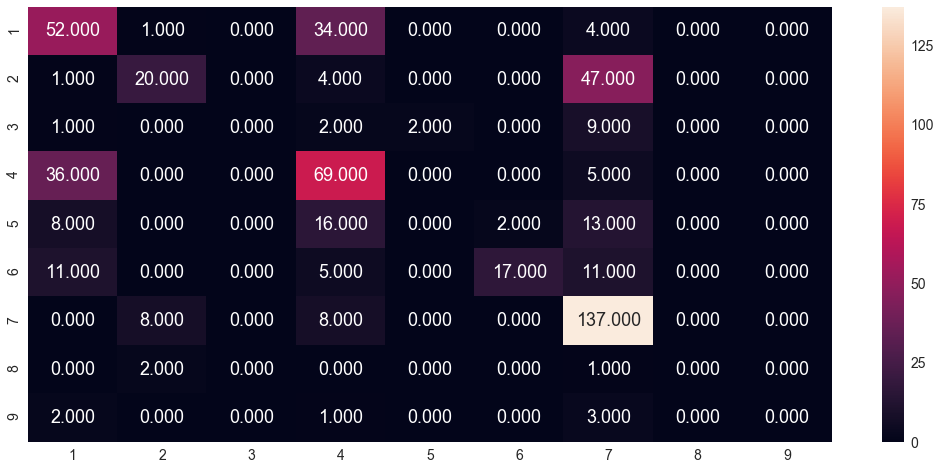

[[ 52   1   0  34   0   0   4   0   0]
 [  1  20   0   4   0   0  47   0   0]
 [  1   0   0   2   2   0   9   0   0]
 [ 36   0   0  69   0   0   5   0   0]
 [  8   0   0  16   0   2  13   0   0]
 [ 11   0   0   5   0  17  11   0   0]
 [  0   8   0   8   0   0 137   0   0]
 [  0   2   0   0   0   0   1   0   0]
 [  2   0   0   1   0   0   3   0   0]]


In [163]:
from sklearn.metrics import confusion_matrix

import seaborn as sns

cmte = confusion_matrix( ycv, clf.predict( xcv1.toarray() ) )

labels = [1,2,3,4,5,6,7,8,9]

plt.figure( figsize = (18,8) )
sns.set( font_scale = 1.4 ) #for label size
sns.heatmap( cmte, annot = True, fmt=".3f", annot_kws={"size": 18}, xticklabels = labels, yticklabels = labels )
plt.show()
plt.close()
print( cmte )

In [164]:
y_ = clf.predict( xcv1.toarray() )
i =  y_ ^ ycv
print(' % of points correctly classified : ', ( ( i.shape[0] - np.count_nonzero( i ) )  / i.shape[0] ) * 100 )

 % of points correctly classified :  55.45112781954887


### Response Coding

In [172]:
alpha = [ 10 ** x for x in range(-5, 3) ] # Various value of Hyperparameter

logError = [ ]

for i in c :
    classifier = MultinomialNB( alpha = i ) 
    classifier.fit(xtrRC, ytr)
    
    # ClaibratedClassifierCV() : Probability calibration with isotonic regression or sigmoid.
    # With this class, the base_estimator is fit on the train set of the cross-validation generator and the ......
    # .... test set is used for calibration. The probabilities for each of the folds are then averaged for prediction
    
    clf = CalibratedClassifierCV( classifier, method="sigmoid" )
    
    # base_estimator : (classifier) The classifier whose output decision func needs to be calibrated to offer more accurate...
    # .... predict_proba outputs. If cv=prefit, the classifier must have been fit already on data.
    
    clf.fit(xtrRC, ytr)
    
    predictY = clf.predict_proba( xcvRC )
    
    logError.append( log_loss( ycv, predictY, labels = clf.classes_, eps = 1e-15) )
    print('For values of alpha = ', i, " the log loss is : ",log_loss(ycv, predictY, labels=clf.classes_, eps=1e-15) )

For values of C =  1e-05  the log loss is :  1.246482537022749
For values of C =  0.0001  the log loss is :  1.2464808071077402
For values of C =  0.001  the log loss is :  1.2464635018103494
For values of C =  0.01  the log loss is :  1.2462903274289794
For values of C =  0.1  the log loss is :  1.2447823354341572
For values of C =  1  the log loss is :  1.2513359000091866
For values of C =  10  the log loss is :  1.287373988017443
For values of C =  100  the log loss is :  1.2942947481918738


In [173]:
bestA = alpha[ np.argmin( logError ) ]

loss( xtrRC, xcvRC, xteRC, bestA )

 Best C :  0.1
 The train log loss is :  0.82032637802086
 The test log loss is :  1.2733801440559376
 The cv log loss is :  1.2772330231829028


# KNN

In [187]:
# Function for calculation of loss
from sklearn.neighbors import KNeighborsClassifier

def loss(xtr, xcv, xte, bestk ):
    clf = KNeighborsClassifier( n_neighbors = k[bestk] )
    clf.fit(xtr, ytr)

    clf = CalibratedClassifierCV( clf, method="sigmoid" )
    clf.fit(xtr, ytr)

    print(' Best K : ', k[bestk])

    predictY = clf.predict_proba( xtr )
    print(' The train log loss is : ',log_loss( ytr, predictY, labels = clf.classes_, eps = 1e-15) )

    predictY = clf.predict_proba( xte )
    print(' The test log loss is : ',log_loss( yte, predictY, labels = clf.classes_, eps = 1e-15) )

    predictY = clf.predict_proba( xcv )
    print(' The cv log loss is : ',log_loss( ycv, predictY, labels = clf.classes_, eps = 1e-15) )

### TF IDF

In [197]:
k = [ 5, 10, 15, 21, 31, 41, 51, 61, 81, 91] # Various value of Hyperparameter

logError = [ ]

for i in k :
    classifier = KNeighborsClassifier( n_neighbors = i ) 
    classifier.fit(xtr1, ytr)
    
    # ClaibratedClassifierCV() : Probability calibration with isotonic regression or sigmoid.
    # With this class, the base_estimator is fit on the train set of the cross-validation generator and the ......
    # .... test set is used for calibration. The probabilities for each of the folds are then averaged for prediction
    
    clf = CalibratedClassifierCV( classifier, method="sigmoid" )
    
    # base_estimator : (classifier) The classifier whose output decision func needs to be calibrated to offer more accurate...
    # .... predict_proba outputs. If cv=prefit, the classifier must have been fit already on data.
    
    clf.fit(xtr1, ytr)
    
    predictY = clf.predict_proba( xcv1 )
    
    logError.append( log_loss( ycv, predictY, labels = clf.classes_, eps = 1e-15) )
    print('For values of K = ', i, " the log loss is : ",log_loss(ycv, predictY, labels=clf.classes_, eps=1e-15) )

For values of C =  5  the log loss is :  1.283033949570175
For values of C =  10  the log loss is :  1.2630424027460543
For values of C =  15  the log loss is :  1.2729575983634867
For values of C =  21  the log loss is :  1.2861553650082576
For values of C =  31  the log loss is :  1.3116409306479997
For values of C =  41  the log loss is :  1.3362886374792582
For values of C =  51  the log loss is :  1.359990321130397
For values of C =  61  the log loss is :  1.369543428344565
For values of C =  81  the log loss is :  1.378053366052914
For values of C =  91  the log loss is :  1.3814393285289128


In [198]:
bestk = np.argmin( logError )

loss( xtr1, xcv1, xte1, bestk )

 Best K :  10
 The train log loss is :  1.0198336961342365
 The test log loss is :  1.3028343984455475
 The cv log loss is :  1.2630424027460543


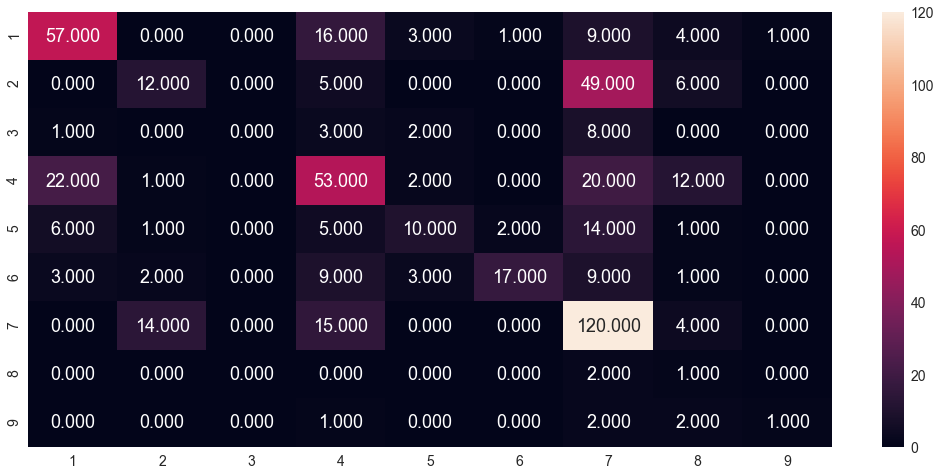

[[ 57   0   0  16   3   1   9   4   1]
 [  0  12   0   5   0   0  49   6   0]
 [  1   0   0   3   2   0   8   0   0]
 [ 22   1   0  53   2   0  20  12   0]
 [  6   1   0   5  10   2  14   1   0]
 [  3   2   0   9   3  17   9   1   0]
 [  0  14   0  15   0   0 120   4   0]
 [  0   0   0   0   0   0   2   1   0]
 [  0   0   0   1   0   0   2   2   1]]


In [189]:
from sklearn.metrics import confusion_matrix

import seaborn as sns

cmte = confusion_matrix( ycv, clf.predict( xcv1.toarray() ) )

labels = [1,2,3,4,5,6,7,8,9]

plt.figure( figsize = (18,8) )
sns.set( font_scale = 1.4 ) #for label size
sns.heatmap( cmte, annot = True, fmt=".3f", annot_kws={"size": 18}, xticklabels = labels, yticklabels = labels )
plt.show()
plt.close()
print( cmte )

In [199]:
y_ = clf.predict( xcv1.toarray() )
i =  y_ ^ ycv
print(' % of points correctly classified : ', ( ( i.shape[0] - np.count_nonzero( i ) )  / i.shape[0] ) * 100 )

 % of points correctly classified :  50.93984962406015


### Response Coding

In [191]:
k = [ 5, 10, 15, 21, 31, 41, 51, 61, 81, 91] # Various value of Hyperparameter

logError = [ ]

for i in k :
    classifier = KNeighborsClassifier( n_neighbors = i ) 
    classifier.fit(xtrRC, ytr)
    
    # ClaibratedClassifierCV() : Probability calibration with isotonic regression or sigmoid.
    # With this class, the base_estimator is fit on the train set of the cross-validation generator and the ......
    # .... test set is used for calibration. The probabilities for each of the folds are then averaged for prediction
    
    clf = CalibratedClassifierCV( classifier, method="sigmoid" )
    
    # base_estimator : (classifier) The classifier whose output decision func needs to be calibrated to offer more accurate...
    # .... predict_proba outputs. If cv=prefit, the classifier must have been fit already on data.
    
    clf.fit(xtrRC, ytr)
    
    predictY = clf.predict_proba( xcvRC )
    
    logError.append( log_loss( ycv, predictY, labels = clf.classes_, eps = 1e-15) )
    print('For values of K = ', i, " the log loss is : ",log_loss(ycv, predictY, labels=clf.classes_, eps=1e-15) )

For values of C =  5  the log loss is :  1.0789301139558245
For values of C =  10  the log loss is :  1.0475330675479642
For values of C =  15  the log loss is :  1.0557656507771171
For values of C =  21  the log loss is :  1.0710770365036797
For values of C =  31  the log loss is :  1.0813334343460983
For values of C =  41  the log loss is :  1.0949936818579713
For values of C =  51  the log loss is :  1.0981159959351041
For values of C =  61  the log loss is :  1.106006037733547
For values of C =  81  the log loss is :  1.1107390360792044
For values of C =  91  the log loss is :  1.109768634610153


In [192]:
bestk = np.argmin( logError )

loss( xtrRC, xcvRC, xteRC, bestk )

 Best K :  10
 The train log loss is :  0.6248520190916479
 The test log loss is :  1.046652305846439
 The cv log loss is :  1.0475330675479642


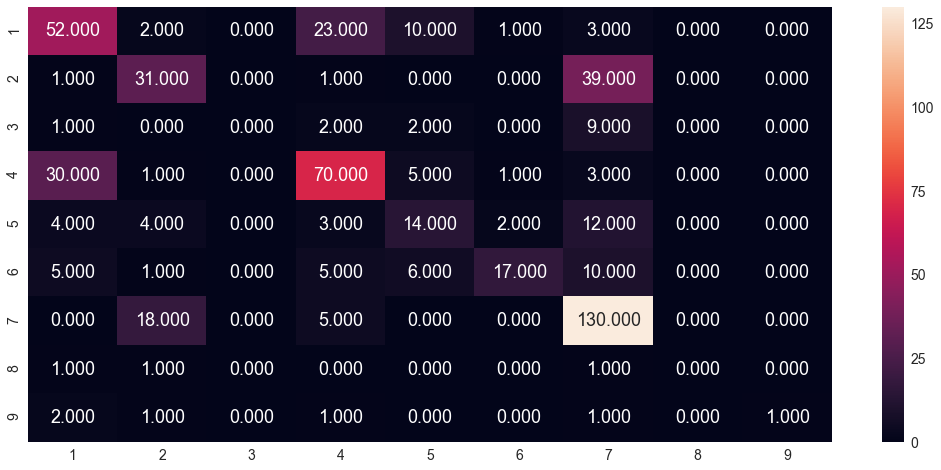

[[ 52   2   0  23  10   1   3   0   0]
 [  1  31   0   1   0   0  39   0   0]
 [  1   0   0   2   2   0   9   0   0]
 [ 30   1   0  70   5   1   3   0   0]
 [  4   4   0   3  14   2  12   0   0]
 [  5   1   0   5   6  17  10   0   0]
 [  0  18   0   5   0   0 130   0   0]
 [  1   1   0   0   0   0   1   0   0]
 [  2   1   0   1   0   0   1   0   1]]


In [194]:
from sklearn.metrics import confusion_matrix

import seaborn as sns

cmte = confusion_matrix( ycv, clf.predict( xcvRC ) )

labels = [1,2,3,4,5,6,7,8,9]

plt.figure( figsize = (18,8) )
sns.set( font_scale = 1.4 ) #for label size
sns.heatmap( cmte, annot = True, fmt=".3f", annot_kws={"size": 18}, xticklabels = labels, yticklabels = labels )
plt.show()
plt.close()
print( cmte )

In [196]:
y_ = clf.predict( xcvRC )
i =  y_ ^ ycv
print(' % of points correctly classified : ', ( ( i.shape[0] - np.count_nonzero( i ) )  / i.shape[0] ) * 100 )

 % of points correctly classified :  59.210526315789465


# Logistic Regression

### With Class Balancing

In [205]:
from sklearn.linear_model import SGDClassifier

# Function for calculation of loss

def loss(xtr, xcv, xte, bestA ):
   
    clf = SGDClassifier(class_weight='balanced', alpha = bestA, penalty='l2', loss='log', random_state=42)
    clf.fit(xtr, ytr)

    clf = CalibratedClassifierCV( clf, method="sigmoid" )
    clf.fit(xtr, ytr)

    print(' Best alpha : ', bestA)

    predictY = clf.predict_proba( xtr )
    print(' The train log loss is : ',log_loss( ytr, predictY, labels = clf.classes_, eps = 1e-15) )

    predictY = clf.predict_proba( xte )
    print(' The test log loss is : ',log_loss( yte, predictY, labels = clf.classes_, eps = 1e-15) )

    predictY = clf.predict_proba( xcv )
    print(' The cv log loss is : ',log_loss( ycv, predictY, labels = clf.classes_, eps = 1e-15) )

### TF IDF

In [218]:
alpha = [ 10 ** x for x in range(-6, 3) ]

logError = [ ]

for i in alpha :
    classifier = SGDClassifier(class_weight='balanced', alpha = i, penalty='l2', loss='log', random_state=42)
    classifier.fit(xtr1, ytr)
    
    # ClaibratedClassifierCV() : Probability calibration with isotonic regression or sigmoid.
    # With this class, the base_estimator is fit on the train set of the cross-validation generator and the ......
    # .... test set is used for calibration. The probabilities for each of the folds are then averaged for prediction
    
    clf = CalibratedClassifierCV( classifier, method="sigmoid" )
    
    # base_estimator : (classifier) The classifier whose output decision func needs to be calibrated to offer more accurate...
    # .... predict_proba outputs. If cv=prefit, the classifier must have been fit already on data.
    
    clf.fit(xtr1, ytr)
    
    predictY = clf.predict_proba( xcv1 )
    
    logError.append( log_loss( ycv, predictY, labels = clf.classes_, eps = 1e-15) )
    print('For values of alpha = ', i, " the log loss is : ",log_loss(ycv, predictY, labels=clf.classes_, eps=1e-15) )

For values of alpha =  1e-06  the log loss is :  1.5063893983961287
For values of alpha =  1e-05  the log loss is :  1.4571228546824497
For values of alpha =  0.0001  the log loss is :  1.2382167626522886
For values of alpha =  0.001  the log loss is :  1.1586516367925752
For values of alpha =  0.01  the log loss is :  1.2987602436908339
For values of alpha =  0.1  the log loss is :  1.6783091886002481
For values of alpha =  1  the log loss is :  1.7925592151220566
For values of alpha =  10  the log loss is :  1.8040049693419111
For values of alpha =  100  the log loss is :  1.805239667123966


In [219]:
bestA = alpha[ np.argmin( logError ) ]
loss( xtr1, xcv1, xte1, bestA )

0.001
 Best alpha :  0.001
 The train log loss is :  0.8182540352538697
 The test log loss is :  1.1728358837757225
 The cv log loss is :  1.1586516367925752


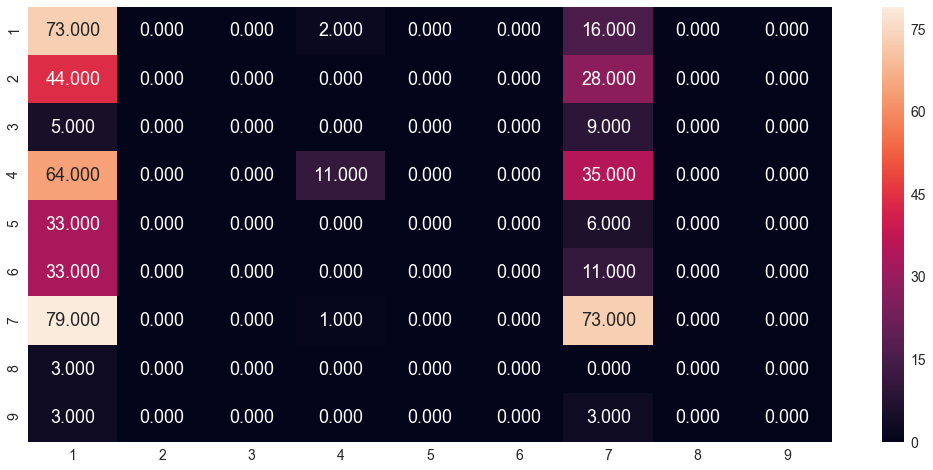

[[73  0  0  2  0  0 16  0  0]
 [44  0  0  0  0  0 28  0  0]
 [ 5  0  0  0  0  0  9  0  0]
 [64  0  0 11  0  0 35  0  0]
 [33  0  0  0  0  0  6  0  0]
 [33  0  0  0  0  0 11  0  0]
 [79  0  0  1  0  0 73  0  0]
 [ 3  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  3  0  0]]


In [220]:
cmte = confusion_matrix( ycv, clf.predict( xcv1.toarray() ) )

labels = [1,2,3,4,5,6,7,8,9]

plt.figure( figsize = (18,8) )
sns.set( font_scale = 1.4 ) #for label size
sns.heatmap( cmte, annot = True, fmt=".3f", annot_kws={"size": 18}, xticklabels = labels, yticklabels = labels )
plt.show()
plt.close()
print( cmte )

In [221]:
y_ = clf.predict( xcv1 )
i =  y_ ^ ycv
print(' % of points correctly classified : ', ( ( i.shape[0] - np.count_nonzero( i ) )  / i.shape[0] ) * 100 )

 % of points correctly classified :  29.51127819548872


### Response Coding

In [222]:
alpha = [ 10 ** x for x in range(-6, 3) ]

logError = [ ]

for i in alpha :
    classifier = SGDClassifier(class_weight='balanced', alpha = i, penalty='l2', loss='log', random_state=42)
    classifier.fit(xtrRC, ytr)
    
    # ClaibratedClassifierCV() : Probability calibration with isotonic regression or sigmoid.
    # With this class, the base_estimator is fit on the train set of the cross-validation generator and the ......
    # .... test set is used for calibration. The probabilities for each of the folds are then averaged for prediction
    
    clf = CalibratedClassifierCV( classifier, method="sigmoid" )
    
    # base_estimator : (classifier) The classifier whose output decision func needs to be calibrated to offer more accurate...
    # .... predict_proba outputs. If cv=prefit, the classifier must have been fit already on data.
    
    clf.fit(xtrRC, ytr)
    
    predictY = clf.predict_proba( xcvRC )
    
    logError.append( log_loss( ycv, predictY, labels = clf.classes_, eps = 1e-15) )
    print('For values of alpha = ', i, " the log loss is : ",log_loss(ycv, predictY, labels=clf.classes_, eps=1e-15) )

For values of alpha =  1e-06  the log loss is :  1.0986549691791756
For values of alpha =  1e-05  the log loss is :  1.0919567876346747
For values of alpha =  0.0001  the log loss is :  1.1040193433331171
For values of alpha =  0.001  the log loss is :  1.1887809525540325
For values of alpha =  0.01  the log loss is :  1.248442424069106
For values of alpha =  0.1  the log loss is :  1.2612353897383455
For values of alpha =  1  the log loss is :  1.3106901118061314
For values of alpha =  10  the log loss is :  1.517841257816585
For values of alpha =  100  the log loss is :  1.5586175607787405


In [224]:
bestA = alpha[ np.argmin( logError ) ]
print(bestA)
loss( xtr1, xcv1, xte1, bestA )

1e-05
 Best alpha :  1e-05
 The train log loss is :  0.7018397395316732
 The test log loss is :  1.4089618692249748
 The cv log loss is :  1.4571228546824497


In [226]:
y_ = clf.predict( xcvRC )
i =  y_ ^ ycv
print(' % of points correctly classified : ', ( ( i.shape[0] - np.count_nonzero( i ) )  / i.shape[0] ) * 100 )

 % of points correctly classified :  41.16541353383459


### Without Class Balancing

In [ ]:
from sklearn.linear_model import SGDClassifier

# Function for calculation of loss

def loss(xtr, xcv, xte, bestA ):
   
    clf = SGDClassifier( alpha = bestA, penalty='l2', loss='log', random_state=42 )
    clf.fit(xtr, ytr)

    clf = CalibratedClassifierCV( clf, method="sigmoid" )
    clf.fit(xtr, ytr)

    print(' Best alpha : ', bestA)

    predictY = clf.predict_proba( xtr )
    print(' The train log loss is : ',log_loss( ytr, predictY, labels = clf.classes_, eps = 1e-15) )

    predictY = clf.predict_proba( xte )
    print(' The test log loss is : ',log_loss( yte, predictY, labels = clf.classes_, eps = 1e-15) )

    predictY = clf.predict_proba( xcv )
    print(' The cv log loss is : ',log_loss( ycv, predictY, labels = clf.classes_, eps = 1e-15) )

### TF IDF

In [228]:
alpha = [ 10 ** x for x in range(-6, 3) ]

logError = [ ]

for i in alpha :
    classifier = SGDClassifier( alpha = i, penalty='l2', loss='log', random_state=42)
    classifier.fit(xtr1, ytr)
    
    # ClaibratedClassifierCV() : Probability calibration with isotonic regression or sigmoid.
    # With this class, the base_estimator is fit on the train set of the cross-validation generator and the ......
    # .... test set is used for calibration. The probabilities for each of the folds are then averaged for prediction
    
    clf = CalibratedClassifierCV( classifier, method="sigmoid" )
    
    # base_estimator : (classifier) The classifier whose output decision func needs to be calibrated to offer more accurate...
    # .... predict_proba outputs. If cv=prefit, the classifier must have been fit already on data.
    
    clf.fit(xtr1, ytr)
    
    predictY = clf.predict_proba( xcv1 )
    
    logError.append( log_loss( ycv, predictY, labels = clf.classes_, eps = 1e-15) )
    print('For values of alpha = ', i, " the log loss is : ",log_loss(ycv, predictY, labels=clf.classes_, eps=1e-15) )

For values of alpha =  1e-06  the log loss is :  1.4904062884970055
For values of alpha =  1e-05  the log loss is :  1.5118665541613812
For values of alpha =  0.0001  the log loss is :  1.3130731836339045
For values of alpha =  0.001  the log loss is :  1.244772588411769
For values of alpha =  0.01  the log loss is :  1.4581987700374688
For values of alpha =  0.1  the log loss is :  1.669935971923776
For values of alpha =  1  the log loss is :  1.7738383754715215
For values of alpha =  10  the log loss is :  1.7874345929283961
For values of alpha =  100  the log loss is :  1.788965929608086


In [229]:
bestA = alpha[ np.argmin( logError ) ]
print(bestA)
loss( xtr1, xcv1, xte1, bestA )

0.001
 Best alpha :  0.001
 The train log loss is :  0.8182540352538697
 The test log loss is :  1.1728358837757225
 The cv log loss is :  1.1586516367925752


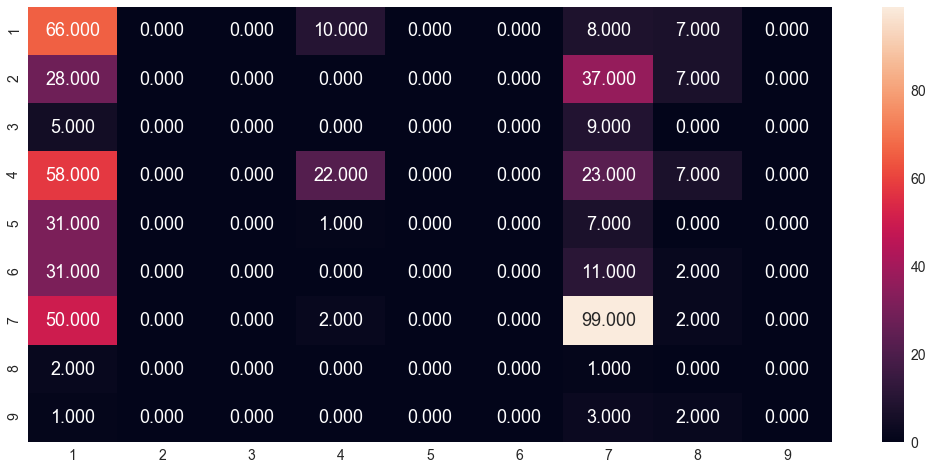

[[66  0  0 10  0  0  8  7  0]
 [28  0  0  0  0  0 37  7  0]
 [ 5  0  0  0  0  0  9  0  0]
 [58  0  0 22  0  0 23  7  0]
 [31  0  0  1  0  0  7  0  0]
 [31  0  0  0  0  0 11  2  0]
 [50  0  0  2  0  0 99  2  0]
 [ 2  0  0  0  0  0  1  0  0]
 [ 1  0  0  0  0  0  3  2  0]]


In [230]:
cmte = confusion_matrix( ycv, clf.predict( xcv1.toarray() ) )

labels = [1,2,3,4,5,6,7,8,9]

plt.figure( figsize = (18,8) )
sns.set( font_scale = 1.4 ) #for label size
sns.heatmap( cmte, annot = True, fmt=".3f", annot_kws={"size": 18}, xticklabels = labels, yticklabels = labels )
plt.show()
plt.close()
print( cmte )

In [231]:
y_ = clf.predict( xcv1 )
i =  y_ ^ ycv
print(' % of points correctly classified : ', ( ( i.shape[0] - np.count_nonzero( i ) )  / i.shape[0] ) * 100 )

 % of points correctly classified :  35.150375939849624


### Response Coding

In [232]:
alpha = [ 10 ** x for x in range(-6, 3) ]

logError = [ ]

for i in alpha :
    classifier = SGDClassifier( alpha = i, penalty='l2', loss='log', random_state=42)
    classifier.fit(xtrRC, ytr)
    
    # ClaibratedClassifierCV() : Probability calibration with isotonic regression or sigmoid.
    # With this class, the base_estimator is fit on the train set of the cross-validation generator and the ......
    # .... test set is used for calibration. The probabilities for each of the folds are then averaged for prediction
    
    clf = CalibratedClassifierCV( classifier, method="sigmoid" )
    
    # base_estimator : (classifier) The classifier whose output decision func needs to be calibrated to offer more accurate...
    # .... predict_proba outputs. If cv=prefit, the classifier must have been fit already on data.
    
    clf.fit(xtrRC, ytr)
    
    predictY = clf.predict_proba( xcvRC )
    
    logError.append( log_loss( ycv, predictY, labels = clf.classes_, eps = 1e-15) )
    print('For values of alpha = ', i, " the log loss is : ",log_loss(ycv, predictY, labels=clf.classes_, eps=1e-15) )

For values of alpha =  1e-06  the log loss is :  1.107127406155907
For values of alpha =  1e-05  the log loss is :  1.0957538578359236
For values of alpha =  0.0001  the log loss is :  1.1052195122101505
For values of alpha =  0.001  the log loss is :  1.1883973107200951
For values of alpha =  0.01  the log loss is :  1.2473975592410704
For values of alpha =  0.1  the log loss is :  1.2916415298447228
For values of alpha =  1  the log loss is :  1.3005151088312032
For values of alpha =  10  the log loss is :  1.4332004059413053
For values of alpha =  100  the log loss is :  1.463254654115955


In [234]:
bestA = alpha[ np.argmin( logError ) ]
loss( xtr1, xcv1, xte1, bestA )

 Best alpha :  1e-05
 The train log loss is :  0.7018397395316732
 The test log loss is :  1.4089618692249748
 The cv log loss is :  1.4571228546824497


In [ ]:
y_ = clf.predict( xcvRC )
i =  y_ ^ ycv
print(' % of points correctly classified : ', ( ( i.shape[0] - np.count_nonzero( i ) )  / i.shape[0] ) * 100 )

## Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

alpha = [100,200,300, 500,1000] # Various value of Hyperparameter
max_depth = [2, 5, 7, 10]

logError = [ ]

for i in alpha :
    for j in max_depth:
        classifier = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        classifier.fit(xtrRC, ytr)

        # ClaibratedClassifierCV() : Probability calibration with isotonic regression or sigmoid.
        # With this class, the base_estimator is fit on the train set of the cross-validation generator and the ......
        # .... test set is used for calibration. The probabilities for each of the folds are then averaged for prediction

        clf = CalibratedClassifierCV( classifier, method="sigmoid" )

        # base_estimator : (classifier) The classifier whose output decision func needs to be calibrated to offer more accurate...
        # .... predict_proba outputs. If cv=prefit, the classifier must have been fit already on data.

        clf.fit(xtrRC, ytr)

        predictY = clf.predict_proba( xcvRC )

        logError.append( log_loss( ycv, predictY, labels = clf.classes_, eps = 1e-15) )
        print('For values of n_estimators = ', i,' and depth = ', j, " the log loss is : ",\
                          log_loss(ycv, predictY, labels=clf.classes_, eps=1e-15) )

For values of alpha =  100  and depth =  2  the log loss is :  1.5418734022337832
For values of alpha =  100  and depth =  5  the log loss is :  1.262023672528224
For values of alpha =  100  and depth =  7  the log loss is :  1.3379918400892044
For values of alpha =  100  and depth =  10  the log loss is :  1.6709502646151968
For values of alpha =  200  and depth =  2  the log loss is :  1.5570575268060736
For values of alpha =  200  and depth =  5  the log loss is :  1.3301566396310418
For values of alpha =  200  and depth =  7  the log loss is :  1.3516230210182125
For values of alpha =  200  and depth =  10  the log loss is :  1.6963349954176763
For values of alpha =  300  and depth =  2  the log loss is :  1.5680191405850497
For values of alpha =  300  and depth =  5  the log loss is :  1.346770389766177
For values of alpha =  300  and depth =  7  the log loss is :  1.3906203736149942
For values of alpha =  300  and depth =  10  the log loss is :  1.6992828416099646
For values of a

In [89]:
bestDepth = 7
bestEstimators = 100

classifier = RandomForestClassifier( n_estimators=bestEstimators, criterion='gini', max_depth=bestDepth, random_state=42\
                                    , n_jobs = -1 )

classifier.fit(xtrRC, ytr)

clf = CalibratedClassifierCV( classifier, method="sigmoid" )
clf.fit(xtrRC, ytr)

print(' Best n_estimators  : ', bestEstimators, ' Best max_depth : ', bestDepth )

predictY = clf.predict_proba( xtrRC )
print(' The train log loss is : ',log_loss( ytr, predictY, labels = clf.classes_, eps = 1e-15) )

predictY = clf.predict_proba( xteRC )
print(' The test log loss is : ',log_loss( yte, predictY, labels = clf.classes_, eps = 1e-15) )

predictY = clf.predict_proba( xcvRC )
print(' The cv log loss is : ',log_loss( ycv, predictY, labels = clf.classes_, eps = 1e-15) )

 Best n_estimators  :  100  Best max_depth :  7
 The train log loss is :  0.03482129988906542
 The test log loss is :  1.4312001810283093
 The cv log loss is :  1.3379918400892044


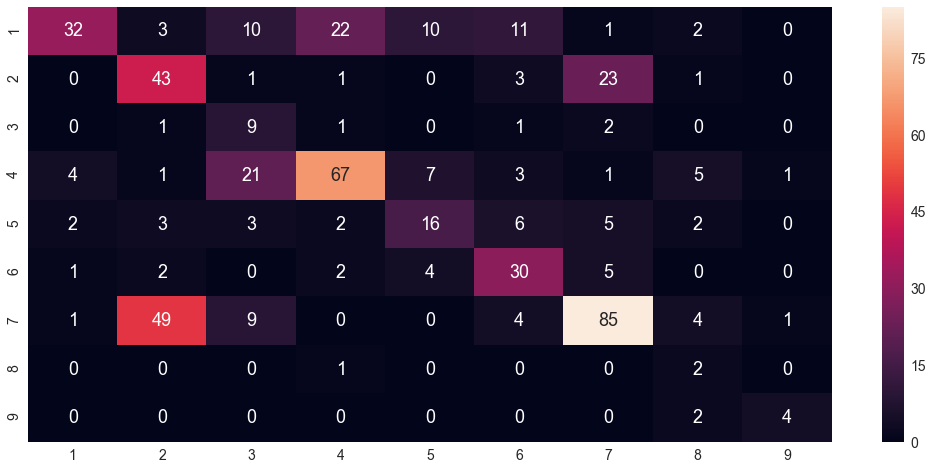

[[32  3 10 22 10 11  1  2  0]
 [ 0 43  1  1  0  3 23  1  0]
 [ 0  1  9  1  0  1  2  0  0]
 [ 4  1 21 67  7  3  1  5  1]
 [ 2  3  3  2 16  6  5  2  0]
 [ 1  2  0  2  4 30  5  0  0]
 [ 1 49  9  0  0  4 85  4  1]
 [ 0  0  0  1  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  2  4]]


In [95]:
cmte = confusion_matrix( ycv, clf.predict( xcvRC ) )

labels = [1,2,3,4,5,6,7,8,9]

plt.figure( figsize = (18,8) )
sns.set( font_scale = 1.4 ) #for label size
sns.heatmap( cmte, annot = True, annot_kws={"size": 18}, xticklabels = labels, yticklabels = labels )
plt.show()
plt.close()
print( cmte )

In [90]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = [ " Model ", " Featurization ", " Train log loss ", " CV log loss ", " Test log loss " ]

x.add_row( [ " Logistic Regression ", " B.O.W. ", " 0.6992 ", " 1.6783 ", " 1.7061 " ] )
x.add_row( [ " Logistic Regression ", " TFIDF ", " 0.8182 ", " 1.1586 ", " 1.1728 " ] )
x.add_row( [ " Logistic Regression (ClassBalancing) ", " TFIDF ", " 0.8182 ", " 1.1586 ", " 1.1728 " ] )
x.add_row( [ " Logistic Regression ", " ResponseCoding ", " 0.7018 ", " 1.4571 ", " 1.4089 " ] )
x.add_row( [ " Logistic Regression (ClassBalancing) ", " ResponseCoding ", " 0.7018 ", " 1.4571 ", " 1.4089 " ] )
x.add_row(["","","","",""])

x.add_row( [ " Naive Bayes ", " TFIDF ", "  0.8203 ", " 1.2772 ", " 1.2733 " ] )
x.add_row( [ " Naive Bayes ", " ResponseCoding ", "  0.6248 ", " 1.2772 ", " 1.2733 " ] )
x.add_row(["","","","",""])

x.add_row( [ " K Nearest Neighbour ", " TFIDF ", " 1.0198 ", " 1.2630 ", " 1.3028 " ] )
x.add_row( [ " K Nearest Neighbour ", " ResponseCoding ", " 1.0198 ", " 1.0475 ", " 1.0466 " ] )
x.add_row(["","","","",""])

x.add_row( [ " Random Forest ", " ResponseCoding ", " 0.0348 ", " 1.3379 ", " 1.4312 " ] )



print("\n\t\t\t Models and their Corresponding log loss with differnt featurization \n ")
print( x )

# Ref : http://zetcode.com/python/prettytable/


			 Models and their Corresponding log loss with differnt featurization 
 
+----------------------------------------+------------------+------------------+---------------+-----------------+
|                 Model                  |  Featurization   |  Train log loss  |  CV log loss  |  Test log loss  |
+----------------------------------------+------------------+------------------+---------------+-----------------+
|          Logistic Regression           |      B.O.W.      |      0.6992      |     1.6783    |      1.7061     |
|          Logistic Regression           |      TFIDF       |      0.8182      |     1.1586    |      1.1728     |
|  Logistic Regression (ClassBalancing)  |      TFIDF       |      0.8182      |     1.1586    |      1.1728     |
|          Logistic Regression           |  ResponseCoding  |      0.7018      |     1.4571    |      1.4089     |
|  Logistic Regression (ClassBalancing)  |  ResponseCoding  |      0.7018      |     1.4571    |      1.4089     |
|   

<br><br>Since Cross Validation and Test log loss are > 1.0 Feature Engineering may be necessary to improve the model's performence

Feature Engineering of various other models is performed in another Notebook ( called : Cancer Diagnosis Feature Enginnering.ipynb )

## Feature Engineering

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir('E:\Datasets\Cancer Diagnosis')

In [3]:
data = pd.read_csv('Data.csv')

data.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating_Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [4]:
gene = dict( data.Gene.value_counts() )
len( gene )
gene['CBL']

25

In [6]:
# Loop for calculating len of each Gene feature and no. of time it appears in the dataset

li = []
le = []
for ge in data.Gene:
    li.append( gene[ ge ] )
    le.append( len(ge) )
data['countGene'] = li
data['lenGene'] = le

In [7]:
data.head()

,ID,Gene,Variation,Class,TEXT,countGene,lenGene
0,0,FAM58A,Truncating_Mutations,1,cyclin dependent kinases cdks regulate variety...,1,6
1,1,CBL,W802*,2,abstract background non small cell lung cancer...,25,3
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...,25,3
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...,25,3
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...,25,3


In [9]:
var = dict( data.Variation.value_counts() )
print( len(var) )
print( var['Truncating_Mutations'] )

# Loop for calculating len of each Variation feature and no. of time it appears in the dataset

li = []
le = []
for v in data.Variation:
    li.append( var[ v ] )
    le.append( len(v) )
data['countVar'] = li
data['lenVar'] = le

2996
93


In [10]:
from tqdm import tqdm
from statistics import mode
from collections import Counter

In [11]:
a = data['TEXT']
a = list(a)
len(a)

3321

In [13]:
# Loop for calculating len of each TEXT features
le = []
for sent in tqdm( a ):
    le.append( len(sent) )

data['lenText'] = le

100%|██████████████████████████████████████████████████████████████████████████| 3321/3321 [00:00<00:00, 666217.89it/s]


In [15]:
print( len( data.lenText.value_counts() ),' Unique length of TEXT feature' )

data.lenText.value_counts().head()

1899  Unique length of TEXT feature


32995    53
37392    47
34377    42
26199    31
27133    31
Name: lenText, dtype: int64

In [16]:
print( len( data.lenGene.value_counts() ),' Unique length of Gene feature' )

data.lenGene.value_counts()

7  Unique length of Gene feature


4    1276
5    1073
6     500
3     420
7      31
2      20
8       1
Name: lenGene, dtype: int64

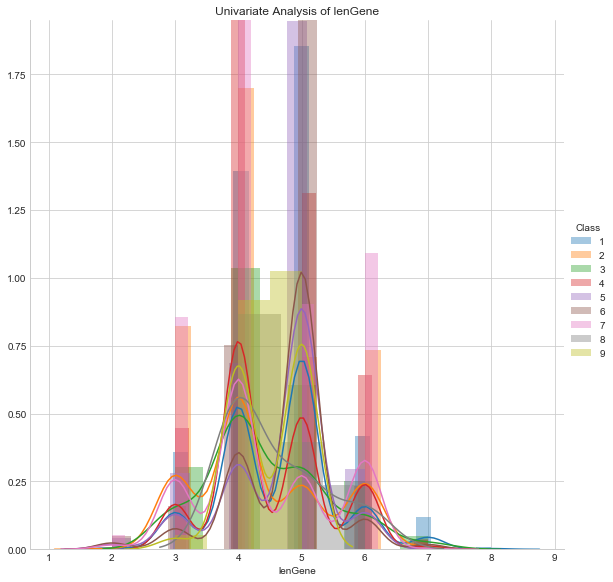

In [18]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue='Class', size=8).map(sns.distplot, "lenGene").add_legend()
plt.title('Univariate Analysis of lenGene')
plt.show()

In [19]:
# Loop for calculating 1st word and last word of every TEXT feature

li = []
w1 = [] # 1st word
wl = [] # last word

for sent in tqdm(a):
    for w in sent.split():
        li.append(w)
    
    w1.append( li[0] )
    wl.append( li[-1] )
    li = []

100%|█████████████████████████████████████████████████████████████████████████████| 3321/3321 [00:04<00:00, 680.26it/s]


In [20]:
data['text1st'] = w1
data['textLast'] = wl

data.head()

,ID,Gene,Variation,Class,TEXT,countGene,lenGene,countVar,lenVar,lenText,text1st,textLast
0,0,FAM58A,Truncating_Mutations,1,cyclin dependent kinases cdks regulate variety...,1,6,93,20,30836,cyclin,females
1,1,CBL,W802*,2,abstract background non small cell lung cancer...,25,3,1,5,27844,abstract,tumorigenesis
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...,25,3,1,5,27844,abstract,tumorigenesis
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...,25,3,1,5,28093,recent,attractive
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...,25,3,1,5,31649,oncogenic,cancer


Features Created :<br>
    <b>countGene</b> : No. of times that Gene occour in the dataset <br>
    <b>lenGene</b> : Length of that Gene<br>
    <b>countVar</b> : No. of times that Variation occour in the dataset <br>
    <b>lenVar</b> : Length of that Variation<br>
    <b>text1st</b> : First word in the feature TEXT<br>
    <b>textLast</b> :  Last word in the feature TEXT<br>
    <b>lenText</b>  : Length of the text ( no. of words present ) <br>

In [21]:
Y = data['Class']

In [33]:
# Test Train CV split

from sklearn.model_selection import train_test_split

xtrd2, xted2, ytrd2, yted2 = train_test_split( data, Y , stratify = Y, test_size = 0.2 )

xtrd2, xcvd2, ytrd2, ycvd2 = train_test_split( xtrd2, ytrd2, stratify = ytrd2, test_size = 0.2 )

In [34]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier

from sklearn.feature_extraction.text import TfidfVectorizer

#Genes
gTfVect2 = TfidfVectorizer( max_features = 1000 )

xtrGeneTF2 = gTfVect2.fit_transform( xtrd2['Gene'] )
xteGeneTF2 = gTfVect2.transform( xted2['Gene'] )
xcvGeneTF2 = gTfVect2.transform( xcvd2['Gene'] )

print(xtrGeneTF2.shape )
print(xcvGeneTF2.shape )
print(xteGeneTF2.shape )

#variation
vTfVect2 = TfidfVectorizer( max_features = 1000 )

xtrVarTF2 = vTfVect2.fit_transform( xtrd2['Variation'] )
xteVarTF2 = vTfVect2.transform( xted2['Variation'] )
xcvVarTF2 = vTfVect2.transform( xcvd2['Variation'] )

print(xtrGeneTF2.shape )
print(xcvGeneTF2.shape )
print(xteGeneTF2.shape )

# Text
teTfvect2 = TfidfVectorizer( max_features = 1000 )

xtrTextTF2 = teTfvect2.fit_transform( xtrd2['TEXT'] )
xtrTextTF2 = normalize( xtrTextTF2 , axis=0 ) # Don't forget to normalize every feature

xteTextTF2 = teTfvect2.transform( xted2['TEXT'] )
xteTextTF2 = normalize( xteTextTF2, axis=0 )

xcvTextTF2 = teTfvect2.transform( xcvd2['TEXT'] )
xcvTextTF2 = normalize( xcvTextTF2, axis=0 ) 

print( xtrTextTF2.shape )
print( xcvTextTF2.shape )
print( xteTextTF2.shape )


# First word in Text
t1stTfVect2 = TfidfVectorizer( max_features = 1000 )

xtrT1stTF2 = t1stTfVect2.fit_transform( xtrd2['text1st'] )
xteT1stTF2 = t1stTfVect2.transform( xted2['text1st'] )
xcvT1stTF2 = t1stTfVect2.transform( xcvd2['text1st'] )

print(xtrT1stTF2.shape )
print(xteT1stTF2.shape )
print(xcvT1stTF2.shape )


# Last word in Text
tLTfVect2 = TfidfVectorizer( max_features = 1000 )

xtrTLTF2 = tLTfVect2.fit_transform( xtrd2['textLast'] )
xteTLTF2 = tLTfVect2.transform( xted2['textLast'] )
xcvTLTF2 = tLTfVect2.transform( xcvd2['textLast'] )

print(xtrTLTF2.shape )
print(xteTLTF2.shape )
print(xcvTLTF2.shape )

(2124, 225)
(532, 225)
(665, 225)
(2124, 225)
(532, 225)
(665, 225)
(2124, 1000)
(532, 1000)
(665, 1000)
(2124, 469)
(665, 469)
(532, 469)
(2124, 563)
(665, 563)
(532, 563)


In [35]:
from sklearn.preprocessing import Normalizer

# countGene
norm = Normalizer()

xtrCG = norm.fit_transform( xtrd2['countGene'].values.reshape(-1,1) )
xcvCG = norm.transform( xcvd2['countGene'].values.reshape(-1,1) )
xteCG = norm.transform( xted2['countGene'].values.reshape(-1,1) )
print(xtrCG.shape)
print(xteCG.shape)
print(xcvCG.shape)


# countVar
norm = Normalizer()

xtrCV = norm.fit_transform( xtrd2['countVar'].values.reshape(-1,1) )
xcvCV = norm.transform( xcvd2['countVar'].values.reshape(-1,1) )
xteCV = norm.transform( xted2['countVar'].values.reshape(-1,1) )
print(xtrCV.shape)
print(xteCV.shape)
print(xcvCV.shape)


# lenVar
norm = Normalizer()

xtrLV = norm.fit_transform( xtrd2['lenVar'].values.reshape(-1,1) )
xcvLV = norm.transform( xcvd2['lenVar'].values.reshape(-1,1) )
xteLV = norm.transform( xted2['lenVar'].values.reshape(-1,1) )
print(xtrLV.shape)
print(xteLV.shape)
print(xcvLV.shape)


#lenGene
norm = Normalizer()

xtrLG = norm.fit_transform( xtrd2['lenGene'].values.reshape(-1,1) )
xcvLG = norm.transform( xcvd2['lenGene'].values.reshape(-1,1) )
xteLG = norm.transform( xted2['lenGene'].values.reshape(-1,1) )
print(xtrLG.shape)
print(xteLG.shape)
print(xcvLG.shape)


#lenText
norm = Normalizer()

xtrLT = norm.fit_transform( xtrd2['lenText'].values.reshape(-1,1) )
xcvLT = norm.transform( xcvd2['lenText'].values.reshape(-1,1) )
xteLT = norm.transform( xted2['lenText'].values.reshape(-1,1) )
print(xtrLT.shape)
print(xteLT.shape)
print(xcvLT.shape)

(2124, 1)
(665, 1)
(532, 1)
(2124, 1)
(665, 1)
(532, 1)
(2124, 1)
(665, 1)
(532, 1)
(2124, 1)
(665, 1)
(532, 1)
(2124, 1)
(665, 1)
(532, 1)


In [36]:
from scipy.sparse import hstack

xtr3 = hstack(( xtrGeneTF2, xtrVarTF2, xtrTextTF2, xtrT1stTF2, xtrTLTF2, xtrCG, xtrCV, xtrLV, xtrLG, xtrLT )).tocsr()
xte3 = hstack(( xteGeneTF2, xteVarTF2, xteTextTF2, xteT1stTF2, xteTLTF2, xteCG, xteCV, xteLV, xteLG, xteLT )).tocsr()
xcv3 = hstack(( xcvGeneTF2, xcvVarTF2, xcvTextTF2, xcvT1stTF2, xcvTLTF2, xcvCG, xcvCV, xcvLV, xcvLG, xcvLT )).tocsr()

print( xtr3.shape )
print( xte3.shape )
print( xcv3.shape )

(2124, 3262)
(665, 3262)
(532, 3262)


In [37]:
import warnings  # removes warning messages from the output

warnings.filterwarnings("ignore")

## Appyling Top 2 models which gave the best Test log loss previously

## Logistic Regression 

In [38]:
alpha = [ 10 ** x for x in range(-6, 3) ]

logError = [ ]

for i in alpha :
    classifier = SGDClassifier( alpha = i, penalty='l2', loss='log', random_state = 42 )
    classifier.fit(xtr3, ytrd2)
    
    # ClaibratedClassifierCV() : Probability calibration with isotonic regression or sigmoid.
    # With this class, the base_estimator is fit on the train set of the cross-validation generator and the ......
    # .... test set is used for calibration. The probabilities for each of the folds are then averaged for prediction
    
    clf = CalibratedClassifierCV( classifier, method="sigmoid" )
    
    # base_estimator : (classifier) The classifier whose output decision func needs to be calibrated to offer more accurate...
    # .... predict_proba outputs. If cv=prefit, the classifier must have been fit already on data.
    
    clf.fit(xtr3, ytrd2)
    
    predictY = clf.predict_proba( xcv3 )
    
    logError.append( log_loss( ycvd2, predictY, labels = clf.classes_, eps = 1e-15) )
    print('For values of alpha = ', i, " the log loss is : ",log_loss(ycvd2, predictY, labels=clf.classes_, eps=1e-15) )

For values of alpha =  1e-06  the log loss is :  1.0294305424753973
For values of alpha =  1e-05  the log loss is :  1.022289980621755
For values of alpha =  0.0001  the log loss is :  0.9847377822692862
For values of alpha =  0.001  the log loss is :  1.0086895010662968
For values of alpha =  0.01  the log loss is :  1.1247032846729363
For values of alpha =  0.1  the log loss is :  1.263172687429077
For values of alpha =  1  the log loss is :  1.4106276460739726
For values of alpha =  10  the log loss is :  1.6716056685227554
For values of alpha =  100  the log loss is :  1.7246162801016123


In [39]:
import numpy as np 

bestA = alpha[ np.argmin(logError) ]
clf = SGDClassifier( alpha = bestA, penalty='l2', loss='log', random_state=42)
clf.fit(xtr3, ytrd2)

clf = CalibratedClassifierCV( clf, method="sigmoid" )
clf.fit(xtr3, ytrd2)

print(' Best alpha : ', bestA)

predictY = clf.predict_proba( xtr3 )
print(' The train log loss is : ',log_loss( ytrd2, predictY, labels = clf.classes_, eps = 1e-15) )

predictY = clf.predict_proba( xte3 )
print(' The test log loss is : ',log_loss( yted2, predictY, labels = clf.classes_, eps = 1e-15) )

predictY = clf.predict_proba( xcv3 )
print(' The cv log loss is : ',log_loss( ycvd2, predictY, labels = clf.classes_, eps = 1e-15) )

 Best alpha :  0.0001
 The train log loss is :  0.510904092466097
 The test log loss is :  0.9487751260963859
 The cv log loss is :  0.9847377822692862


In [41]:
y_ = clf.predict( xte3 )
i =  y_ ^ yted2
print(' % of points correctly classified : ', ( ( i.shape[0] - np.count_nonzero( i ) )  / i.shape[0] ) * 100 )

 % of points correctly classified :  68.87218045112782


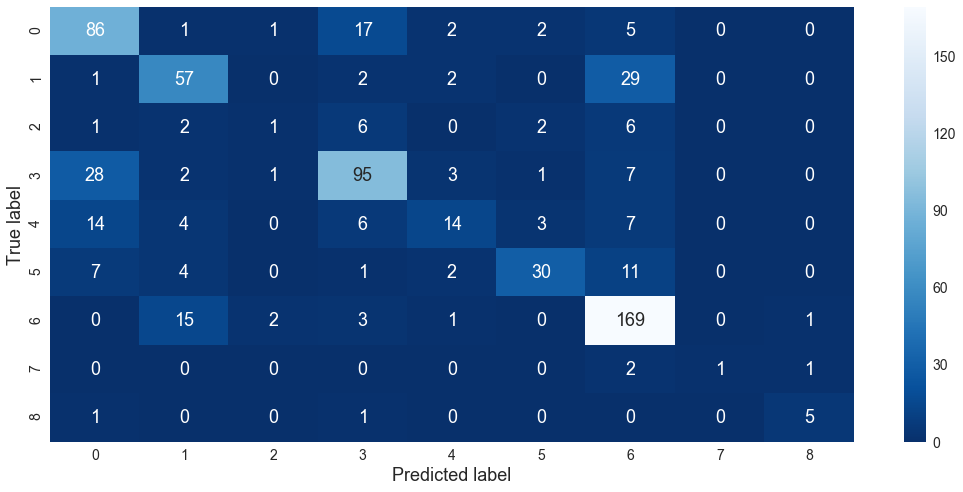

[[ 86   1   1  17   2   2   5   0   0]
 [  1  57   0   2   2   0  29   0   0]
 [  1   2   1   6   0   2   6   0   0]
 [ 28   2   1  95   3   1   7   0   0]
 [ 14   4   0   6  14   3   7   0   0]
 [  7   4   0   1   2  30  11   0   0]
 [  0  15   2   3   1   0 169   0   1]
 [  0   0   0   0   0   0   2   1   1]
 [  1   0   0   1   0   0   0   0   5]]


In [51]:
from sklearn.metrics import confusion_matrix

cmte = confusion_matrix( yted2, clf.predict( xte3 ) )

labels = [1,2,3,4,5,6,7,8,9]

plt.figure( figsize = (18,8) )
sns.set( font_scale = 1.4 ) #for label size
sns.heatmap( cmte,fmt=".0f", annot = True, annot_kws={"size": 18}, cmap='Blues_r' )# font size
plt.ylabel('True label', size=18)
plt.xlabel('Predicted label', size=18)
plt.show()
print( cmte )

## Logistic Regression with Balanced class weight

In [58]:
alpha = [ 10 ** x for x in range(-6, 3) ]

logError = [ ]

for i in alpha :
    classifier = SGDClassifier(class_weight = 'balanced', alpha = i, penalty='l2', loss='log', random_state = 42 )
    classifier.fit(xtr3, ytrd2)
    
    # ClaibratedClassifierCV() : Probability calibration with isotonic regression or sigmoid.
    # With this class, the base_estimator is fit on the train set of the cross-validation generator and the ......
    # .... test set is used for calibration. The probabilities for each of the folds are then averaged for prediction
    
    clf = CalibratedClassifierCV( classifier, method="sigmoid" )
    
    # base_estimator : (classifier) The classifier whose output decision func needs to be calibrated to offer more accurate...
    # .... predict_proba outputs. If cv=prefit, the classifier must have been fit already on data.
    
    clf.fit(xtr3, ytrd2)
    
    predictY = clf.predict_proba( xcv3 )
    
    logError.append( log_loss( ycvd2, predictY, labels = clf.classes_, eps = 1e-15) )
    print('For values of alpha = ', i, " the log loss is : ",log_loss(ycvd2, predictY, labels=clf.classes_, eps=1e-15) )

For values of alpha =  1e-06  the log loss is :  1.0262562750455317
For values of alpha =  1e-05  the log loss is :  1.0345668585108987
For values of alpha =  0.0001  the log loss is :  0.9884228417181702
For values of alpha =  0.001  the log loss is :  1.021265872600087
For values of alpha =  0.01  the log loss is :  1.135664310935033
For values of alpha =  0.1  the log loss is :  1.2042422301360631
For values of alpha =  1  the log loss is :  1.3719866120308124
For values of alpha =  10  the log loss is :  1.7287067056338452
For values of alpha =  100  the log loss is :  1.7777431579648342


In [59]:
import numpy as np 

bestA = alpha[ np.argmin(logError) ]
clf = SGDClassifier(class_weight = 'balanced', alpha = bestA, penalty='l2', loss='log', random_state=42)
clf.fit(xtr3, ytrd2)

clf = CalibratedClassifierCV( clf, method="sigmoid" )
clf.fit(xtr3, ytrd2)

print(' Best alpha : ', bestA)

predictY = clf.predict_proba( xtr3 )
print(' The train log loss is : ',log_loss( ytrd2, predictY, labels = clf.classes_, eps = 1e-15) )

predictY = clf.predict_proba( xte3 )
print(' The test log loss is : ',log_loss( yted2, predictY, labels = clf.classes_, eps = 1e-15) )

predictY = clf.predict_proba( xcv3 )
print(' The cv log loss is : ',log_loss( ycvd2, predictY, labels = clf.classes_, eps = 1e-15) )

 Best alpha :  0.0001
 The train log loss is :  0.5179308812551262
 The test log loss is :  0.9582541793136079
 The cv log loss is :  0.9884228417181702


In [60]:
y_ = clf.predict( xte3 )
i =  y_ ^ yted2
print(' % of points correctly classified : ', ( ( i.shape[0] - np.count_nonzero( i ) )  / i.shape[0] ) * 100 )

 % of points correctly classified :  68.1203007518797


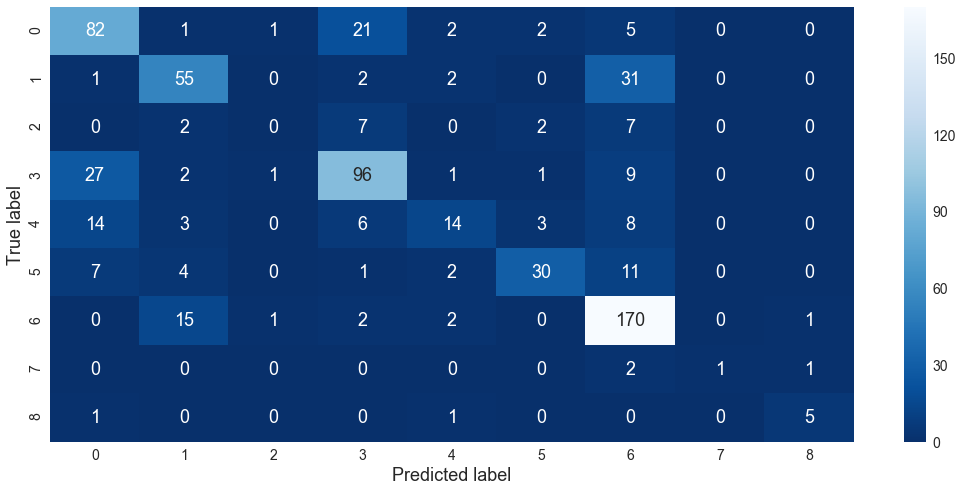

[[ 82   1   1  21   2   2   5   0   0]
 [  1  55   0   2   2   0  31   0   0]
 [  0   2   0   7   0   2   7   0   0]
 [ 27   2   1  96   1   1   9   0   0]
 [ 14   3   0   6  14   3   8   0   0]
 [  7   4   0   1   2  30  11   0   0]
 [  0  15   1   2   2   0 170   0   1]
 [  0   0   0   0   0   0   2   1   1]
 [  1   0   0   0   1   0   0   0   5]]


In [61]:
from sklearn.metrics import confusion_matrix

cmte = confusion_matrix( yted2, clf.predict( xte3 ) )

labels = [1,2,3,4,5,6,7,8,9]

plt.figure( figsize = (18,8) )
sns.set( font_scale = 1.4 ) #for label size
sns.heatmap( cmte,fmt=".0f", annot = True, annot_kws={"size": 18}, cmap='Blues_r' )# font size
plt.ylabel('True label', size=18)
plt.xlabel('Predicted label', size=18)
plt.show()
print( cmte )

## Linear SVM

In [52]:
alpha = [ 10 ** x for x in range(-6, 3) ]

logError = [ ]

for i in alpha :
    classifier = SGDClassifier(class_weight = 'balanced', alpha = i, penalty='l2', loss='hinge', random_state = 42 )
    classifier.fit(xtr3, ytrd2)
    
    # ClaibratedClassifierCV() : Probability calibration with isotonic regression or sigmoid.
    # With this class, the base_estimator is fit on the train set of the cross-validation generator and the ......
    # .... test set is used for calibration. The probabilities for each of the folds are then averaged for prediction
    
    clf = CalibratedClassifierCV( classifier, method="sigmoid" )
    
    # base_estimator : (classifier) The classifier whose output decision func needs to be calibrated to offer more accurate...
    # .... predict_proba outputs. If cv=prefit, the classifier must have been fit already on data.
    
    clf.fit(xtr3, ytrd2)
    
    predictY = clf.predict_proba( xcv3 )
    
    logError.append( log_loss( ycvd2, predictY, labels = clf.classes_, eps = 1e-15) )
    print('For values of alpha = ', i, " the log loss is : ",log_loss(ycvd2, predictY, labels=clf.classes_, eps=1e-15) )

For values of alpha =  1e-06  the log loss is :  1.024259434870708
For values of alpha =  1e-05  the log loss is :  1.0292793384121028
For values of alpha =  0.0001  the log loss is :  1.0256834746864798
For values of alpha =  0.001  the log loss is :  1.0447045187379638
For values of alpha =  0.01  the log loss is :  1.1402368171439061
For values of alpha =  0.1  the log loss is :  1.158659919933519
For values of alpha =  1  the log loss is :  1.343022804988849
For values of alpha =  10  the log loss is :  1.7832046480197103
For values of alpha =  100  the log loss is :  1.783182103642615


In [53]:
import numpy as np 
bestA = alpha[ np.argmin(logError) ]
clf = SGDClassifier(class_weight = 'balanced', alpha = bestA, penalty='l2', loss='log', random_state=42)
clf.fit(xtr3, ytrd2)

clf = CalibratedClassifierCV( clf, method="sigmoid" )
clf.fit(xtr3, ytrd2)

print(' Best alpha : ', bestA)

predictY = clf.predict_proba( xtr3 )
print(' The train log loss is : ',log_loss( ytrd2, predictY, labels = clf.classes_, eps = 1e-15) )

predictY = clf.predict_proba( xte3 )
print(' The test log loss is : ',log_loss( yted2, predictY, labels = clf.classes_, eps = 1e-15) )

predictY = clf.predict_proba( xcv3 )
print(' The cv log loss is : ',log_loss( ycvd2, predictY, labels = clf.classes_, eps = 1e-15) )

 Best alpha :  1e-06
 The train log loss is :  0.5421648583479303
 The test log loss is :  0.9986819266277692
 The cv log loss is :  1.0262562750455317


In [54]:
y_ = clf.predict( xte3 )
i =  y_ ^ yted2
print(' % of points correctly classified : ', ( ( i.shape[0] - np.count_nonzero( i ) )  / i.shape[0] ) * 100 )

 % of points correctly classified :  68.7218045112782


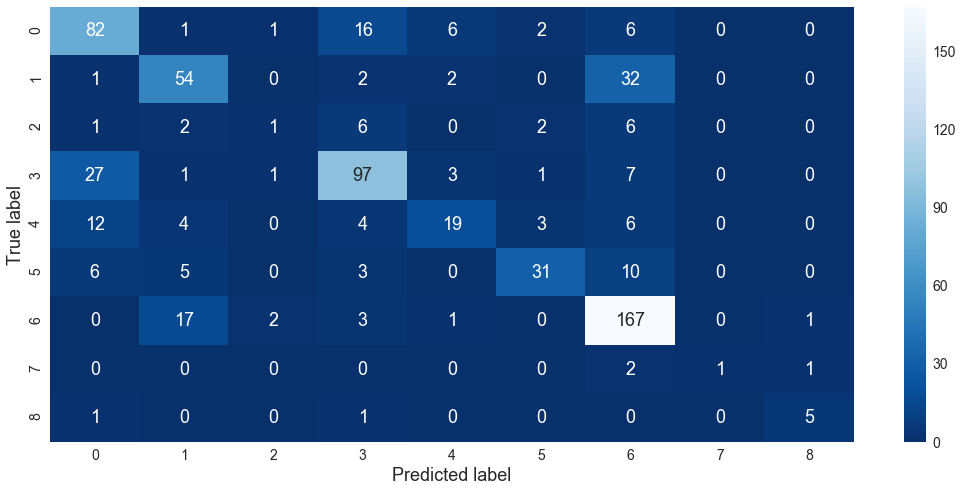

[[ 82   1   1  16   6   2   6   0   0]
 [  1  54   0   2   2   0  32   0   0]
 [  1   2   1   6   0   2   6   0   0]
 [ 27   1   1  97   3   1   7   0   0]
 [ 12   4   0   4  19   3   6   0   0]
 [  6   5   0   3   0  31  10   0   0]
 [  0  17   2   3   1   0 167   0   1]
 [  0   0   0   0   0   0   2   1   1]
 [  1   0   0   1   0   0   0   0   5]]


In [55]:
from sklearn.metrics import confusion_matrix

cmte = confusion_matrix( yted2, clf.predict( xte3 ) )

labels = [1,2,3,4,5,6,7,8,9]

plt.figure( figsize = (18,8) )
sns.set( font_scale = 1.4 ) #for label size
sns.heatmap( cmte,fmt=".0f", annot = True, annot_kws={"size": 18}, cmap='Blues_r' )# font size
plt.ylabel('True label', size=18)
plt.xlabel('Predicted label', size=18)
plt.show()
print( cmte )

In [63]:
from prettytable import PrettyTable
    
x = PrettyTable()
   
x.field_names = [ " Model ", " Featurization ", " Train log loss ", " Test log loss " ]

x.add_row( [ " Logistic Regression ", " TFIDF ", " 0.5102 ", " 0.9257 " ] )
x.add_row( [ " Logistic Regression (balanced class weight) ", " TFIDF ", " 0.5179 ", " 0.9582 " ] )
x.add_row( [ " Linear SVM (balanced class weight) ", " TFIDF ", " 0.5460 ",  " 0.9732 " ] )

print( x )

+-----------------------------------------------+-----------------+------------------+-----------------+
|                     Model                     |  Featurization  |  Train log loss  |  Test log loss  |
+-----------------------------------------------+-----------------+------------------+-----------------+
|              Logistic Regression              |      TFIDF      |      0.5102      |      0.9257     |
|  Logistic Regression (balanced class weight)  |      TFIDF      |      0.5179      |      0.9582     |
|       Linear SVM (balanced class weight)      |      TFIDF      |      0.5460      |      0.9732     |
+-----------------------------------------------+-----------------+------------------+-----------------+


The best model is Logistic Regression with TFIDF text featurization with Test log loss of 0.9257